In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
customerData = pd.read_csv('marketing_campaign.csv',sep='\t')

## Basic Exploratory

In [3]:
customerData

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [4]:
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
colOfNum = []
colOfCat = []
for col in customerData:
    if str(customerData[col].dtypes) != "int64" and str(customerData[col].dtypes) != "float64":
        colOfCat.append(str(col))
    else:
        colOfNum.append(str(col))

In [6]:
print(colOfNum)
print(colOfCat)

['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
['Education', 'Marital_Status', 'Dt_Customer']


In [7]:
colOfCat.extend(['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response','Kidhome','Teenhome'])

In [8]:
for element in ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response','Kidhome','Teenhome']:
    colOfNum.remove(element)

In [9]:
print(colOfNum)
print(colOfCat)

['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']
['Education', 'Marital_Status', 'Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome', 'Teenhome']


In [10]:
customerNumData = pd.DataFrame(customerData[colOfNum])

In [11]:
customerCatData = pd.DataFrame(customerData[colOfCat])

In [12]:
for data in customerCatData:
    customerCatData[data] = customerCatData[data].astype("category")

In [13]:
customerNumData.describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0
mean,5592.159821,1968.805804,52247.251354,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,3.0,11.0
std,3246.662198,11.984069,25173.076661,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.0,0.0
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0
25%,2828.250000,1959.000000,35303.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0
50%,5458.500000,1970.000000,51381.500000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0
75%,8427.750000,1977.000000,68522.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0
max,11191.000000,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0


In [14]:
customerCatData.describe()

,Education,Marital_Status,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kidhome,Teenhome
count,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240,2240
unique,5,8,663,2,2,2,2,2,2,2,3,3
top,Graduation,Married,31-08-2012,0,0,0,0,0,0,0,0,0
freq,1127,864,12,2077,2073,2077,2096,2210,2219,1906,1293,1158


In [15]:
customerNumData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Income               2216 non-null   float64
 3   Recency              2240 non-null   int64  
 4   MntWines             2240 non-null   int64  
 5   MntFruits            2240 non-null   int64  
 6   MntMeatProducts      2240 non-null   int64  
 7   MntFishProducts      2240 non-null   int64  
 8   MntSweetProducts     2240 non-null   int64  
 9   MntGoldProds         2240 non-null   int64  
 10  NumDealsPurchases    2240 non-null   int64  
 11  NumWebPurchases      2240 non-null   int64  
 12  NumCatalogPurchases  2240 non-null   int64  
 13  NumStorePurchases    2240 non-null   int64  
 14  NumWebVisitsMonth    2240 non-null   int64  
 15  Z_CostContact        2240 non-null   i

In [16]:
customerCatData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Education       2240 non-null   category
 1   Marital_Status  2240 non-null   category
 2   Dt_Customer     2240 non-null   category
 3   AcceptedCmp3    2240 non-null   category
 4   AcceptedCmp4    2240 non-null   category
 5   AcceptedCmp5    2240 non-null   category
 6   AcceptedCmp1    2240 non-null   category
 7   AcceptedCmp2    2240 non-null   category
 8   Complain        2240 non-null   category
 9   Response        2240 non-null   category
 10  Kidhome         2240 non-null   category
 11  Teenhome        2240 non-null   category
dtypes: category(12)
memory usage: 51.6 KB


Number of Education: 5
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


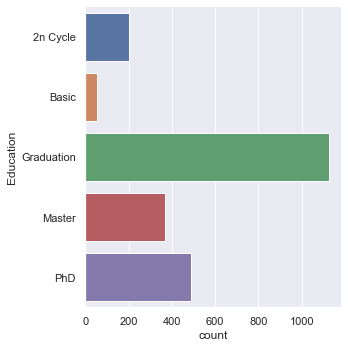

In [17]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Education:", len(customerCatData["Education"].unique()))

# Pokemons in each Generation
print(customerCatData["Education"].value_counts())
sb.catplot(y = "Education", data = customerCatData, kind = "count")

Number of Marital_Status: 8
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


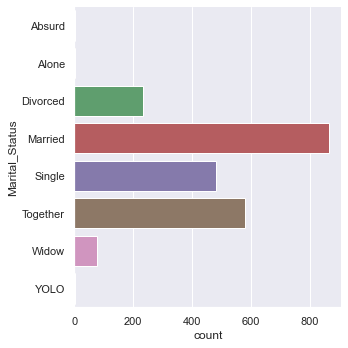

In [18]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Marital_Status:", len(customerCatData["Marital_Status"].unique()))

# Pokemons in each Generation
print(customerCatData["Marital_Status"].value_counts())
sb.catplot(y = "Marital_Status", data = customerCatData, kind = "count")

Number of Complain: 2
0    2219
1      21
Name: Complain, dtype: int64


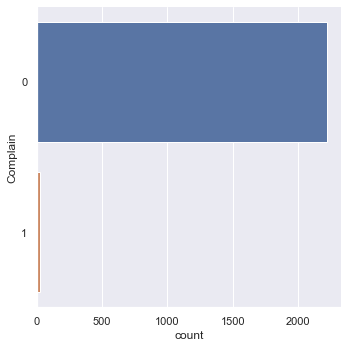

In [19]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Complain:", len(customerCatData["Complain"].unique()))

# Pokemons in each Generation
print(customerCatData["Complain"].value_counts())
sb.catplot(y = "Complain", data = customerCatData, kind = "count")

Number of Response: 2
0    1906
1     334
Name: Response, dtype: int64


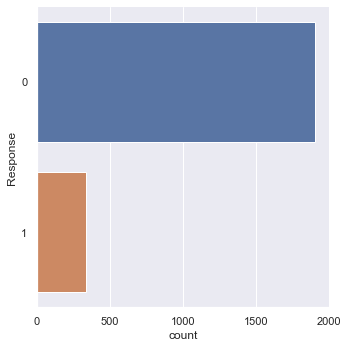

In [20]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Response:", len(customerCatData["Response"].unique()))

# Pokemons in each Generation
print(customerCatData["Response"].value_counts())
sb.catplot(y = "Response", data = customerCatData, kind = "count")

Number of Kidhome: 3
0    1293
1     899
2      48
Name: Kidhome, dtype: int64


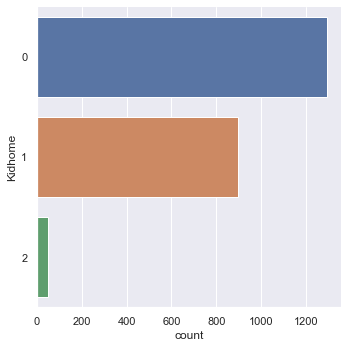

In [21]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Kidhome:", len(customerCatData["Kidhome"].unique()))

# Pokemons in each Generation
print(customerCatData["Kidhome"].value_counts())
sb.catplot(y = "Kidhome", data = customerCatData, kind = "count")

Number of Teenhome: 3
0    1158
1    1030
2      52
Name: Teenhome, dtype: int64


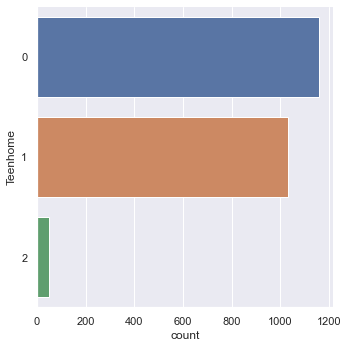

In [22]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Teenhome:", len(customerCatData["Teenhome"].unique()))

# Pokemons in each Generation
print(customerCatData["Teenhome"].value_counts())
sb.catplot(y = "Teenhome", data = customerCatData, kind = "count")

<AxesSubplot:>

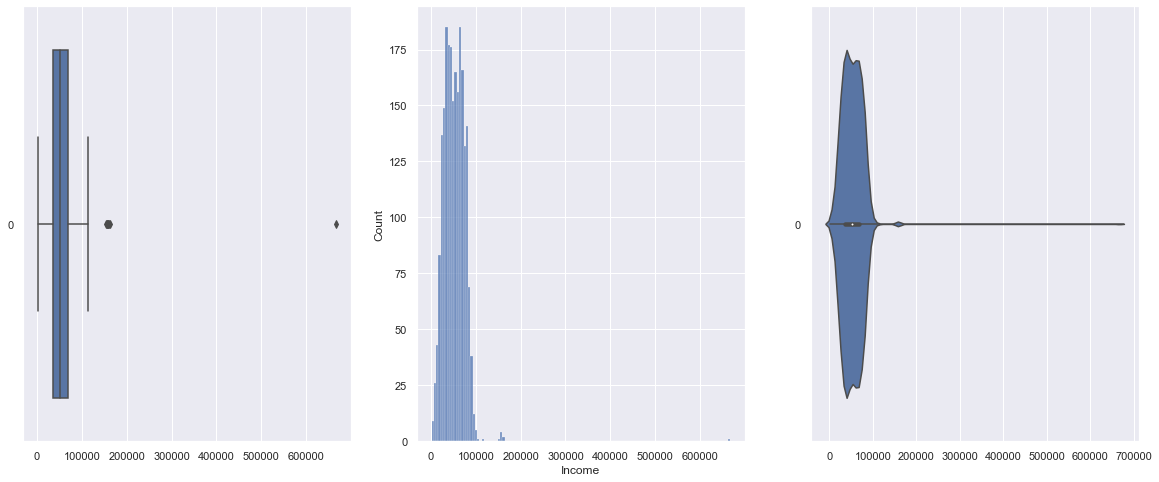

In [23]:
f, axes = plt.subplots(1,3, figsize=(20, 8))
sb.boxplot(data = customerNumData['Income'], orient = "h", ax = axes[0])
sb.histplot(data = customerNumData['Income'], ax = axes[1])
sb.violinplot(data = customerNumData['Income'], orient = "h", ax = axes[2])


<AxesSubplot:>

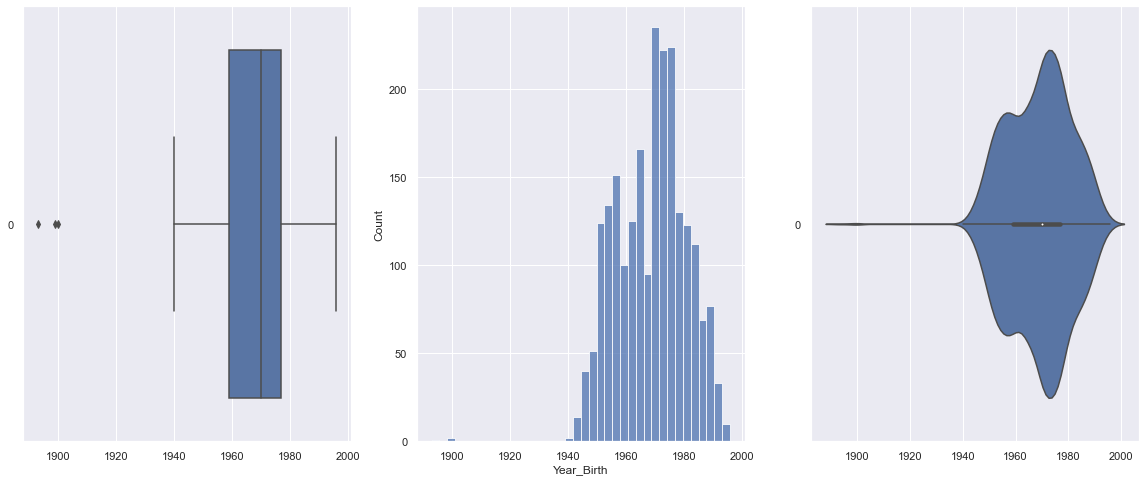

In [24]:
f, axes = plt.subplots(1,3, figsize=(20, 8))
sb.boxplot(data = customerNumData['Year_Birth'], orient = "h", ax = axes[0])
sb.histplot(data = customerNumData['Year_Birth'], ax = axes[1])
sb.violinplot(data = customerNumData['Year_Birth'], orient = "h", ax = axes[2])

<AxesSubplot:xlabel='Marital_Status', ylabel='MntGoldProds'>

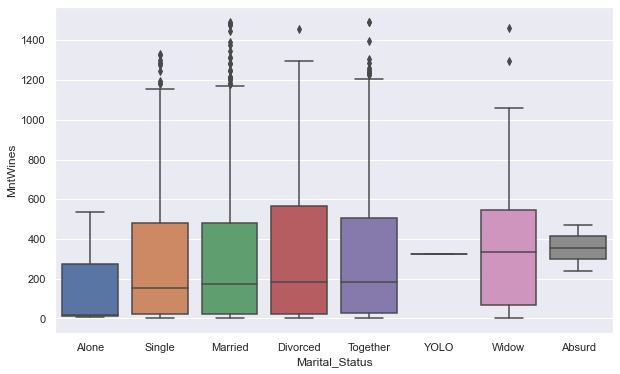

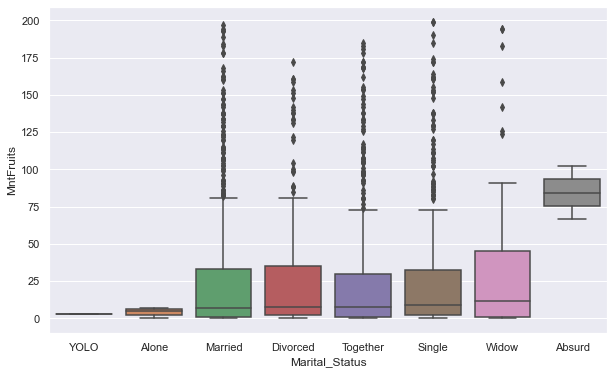

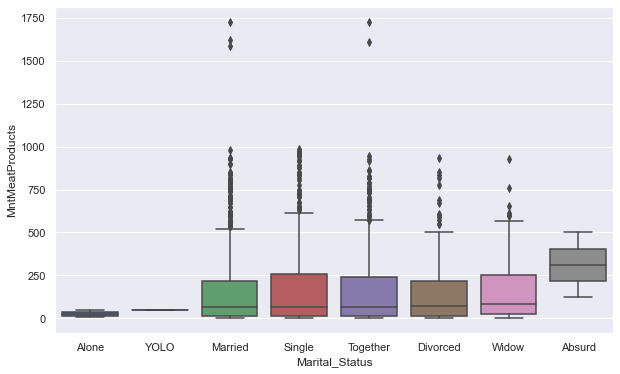

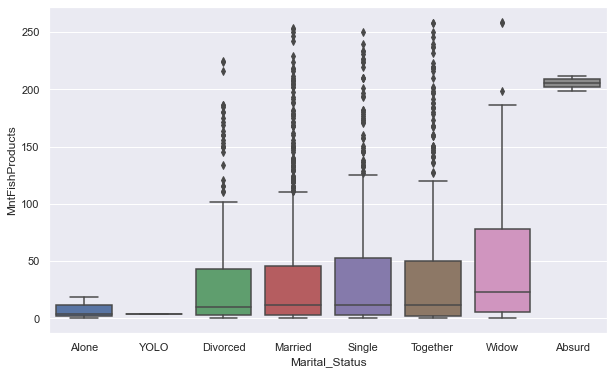

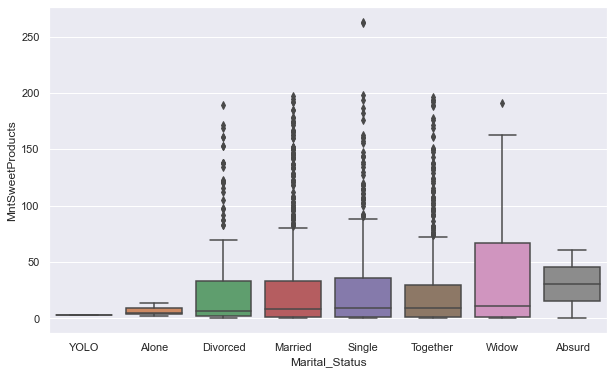

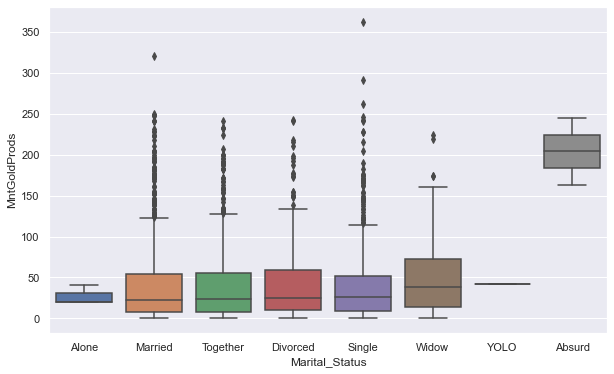

In [25]:
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntWines']].groupby(['Marital_Status']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntFruits']].groupby(['Marital_Status']).median().sort_values(by='MntFruits')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntFruits'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntMeatProducts']].groupby(['Marital_Status']).median().sort_values(by='MntMeatProducts')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntMeatProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntFishProducts']].groupby(['Marital_Status']).median().sort_values(by='MntFishProducts')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntFishProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntSweetProducts']].groupby(['Marital_Status']).median().sort_values(by='MntSweetProducts')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntSweetProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Marital_Status', 'MntGoldProds']].groupby(['Marital_Status']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData['Marital_Status'],y = customerData['MntGoldProds'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Education', ylabel='MntGoldProds'>

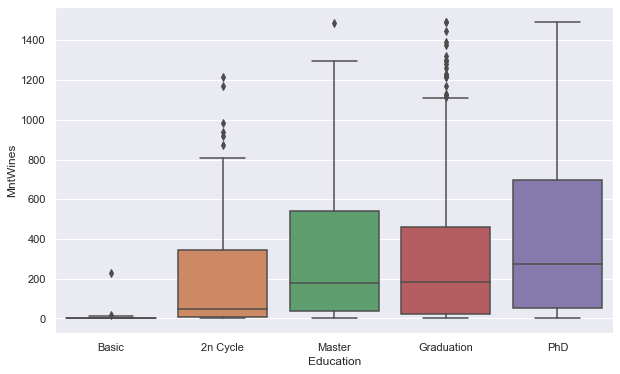

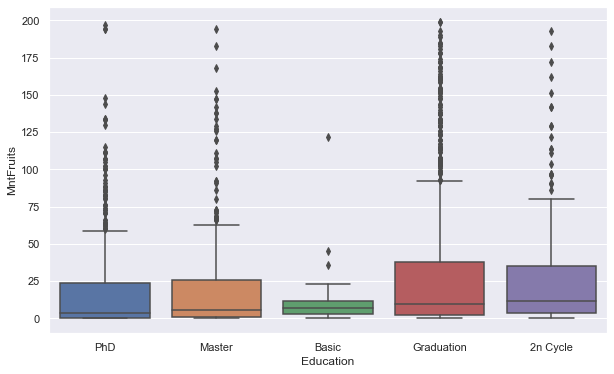

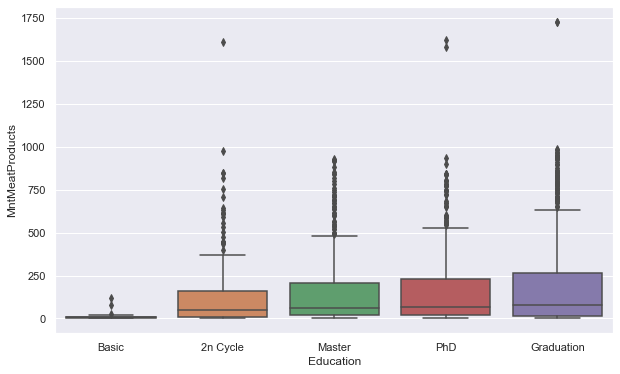

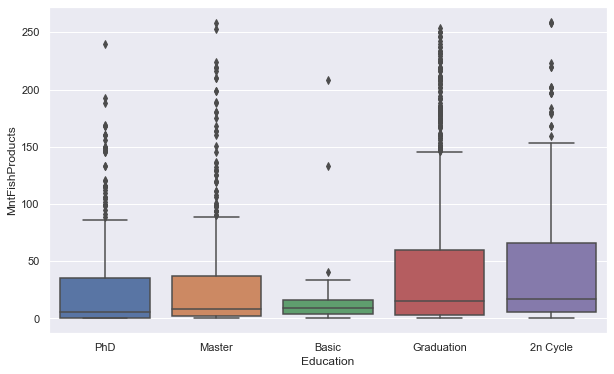

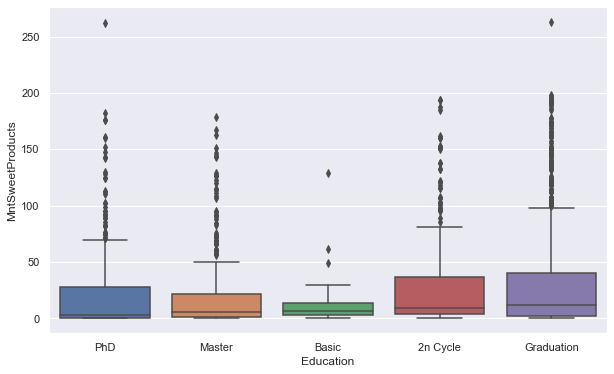

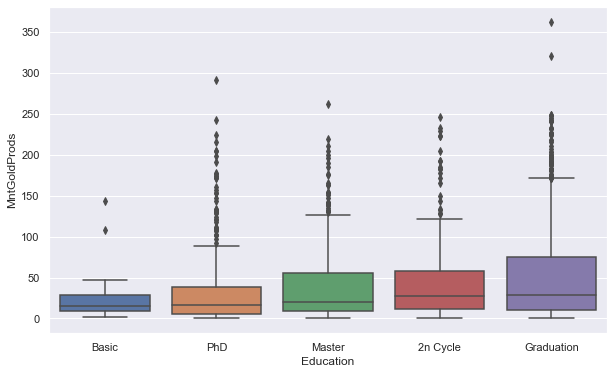

In [26]:
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntWines']].groupby(['Education']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData['Education'],y = customerData['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntFruits']].groupby(['Education']).median().sort_values(by='MntFruits')
sb.boxplot(x = customerData['Education'],y = customerData['MntFruits'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntMeatProducts']].groupby(['Education']).median().sort_values(by='MntMeatProducts')
sb.boxplot(x = customerData['Education'],y = customerData['MntMeatProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntFishProducts']].groupby(['Education']).median().sort_values(by='MntFishProducts')
sb.boxplot(x = customerData['Education'],y = customerData['MntFishProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntSweetProducts']].groupby(['Education']).median().sort_values(by='MntSweetProducts')
sb.boxplot(x = customerData['Education'],y = customerData['MntSweetProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Education', 'MntGoldProds']].groupby(['Education']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData['Education'],y = customerData['MntGoldProds'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Kidhome', ylabel='MntGoldProds'>

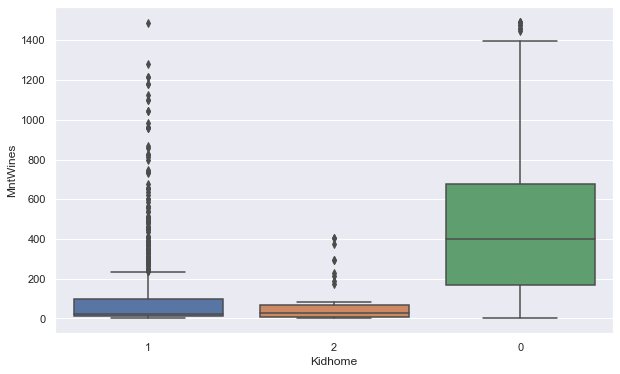

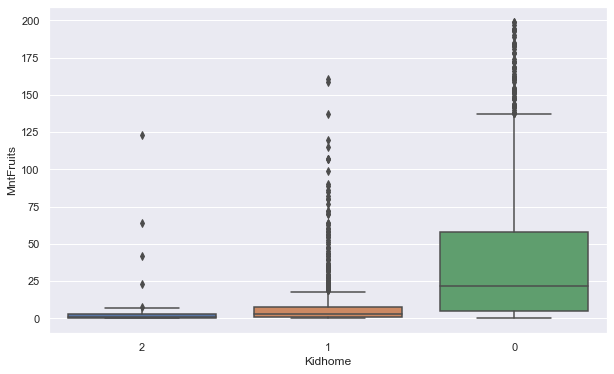

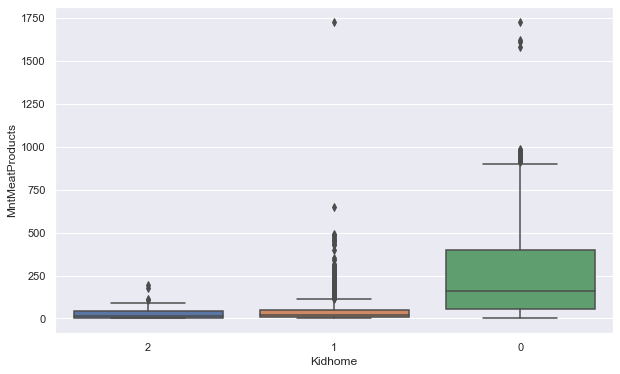

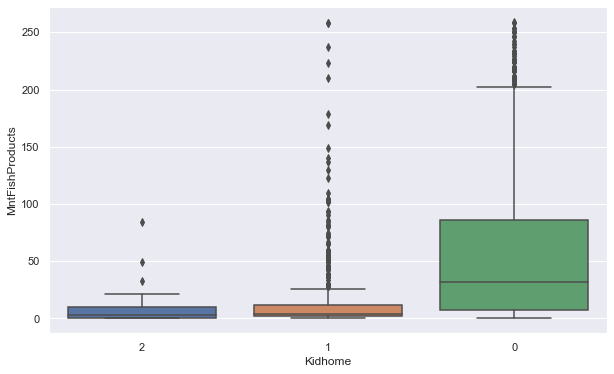

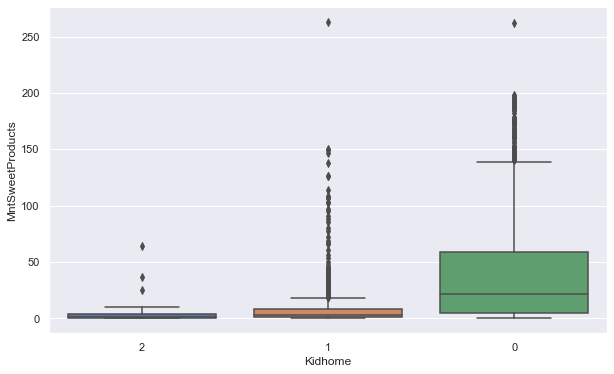

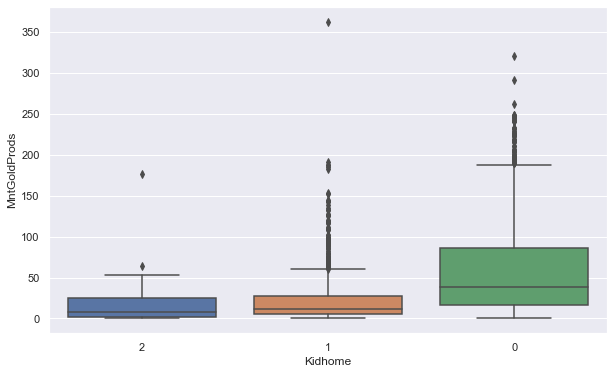

In [27]:
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntWines']].groupby(['Kidhome']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntFruits']].groupby(['Kidhome']).median().sort_values(by='MntFruits')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntFruits'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntMeatProducts']].groupby(['Kidhome']).median().sort_values(by='MntMeatProducts')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntMeatProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntFishProducts']].groupby(['Kidhome']).median().sort_values(by='MntFishProducts')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntFishProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntSweetProducts']].groupby(['Kidhome']).median().sort_values(by='MntSweetProducts')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntSweetProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Kidhome', 'MntGoldProds']].groupby(['Kidhome']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData['Kidhome'],y = customerData['MntGoldProds'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Teenhome', ylabel='MntGoldProds'>

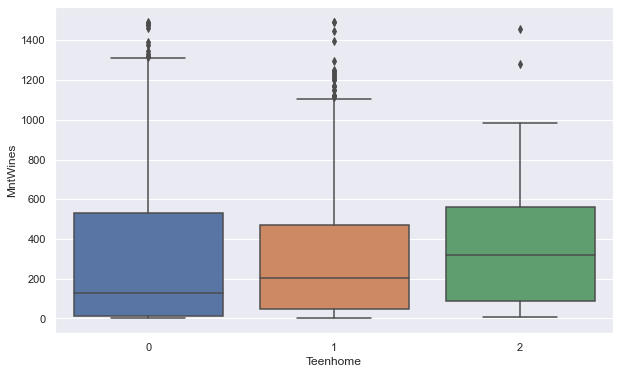

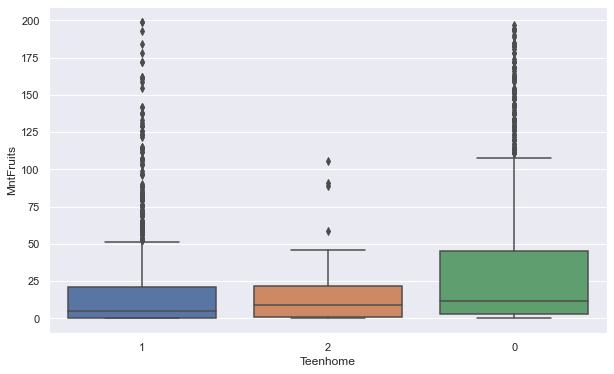

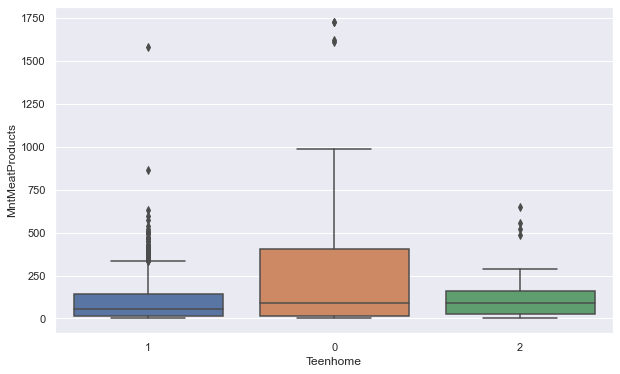

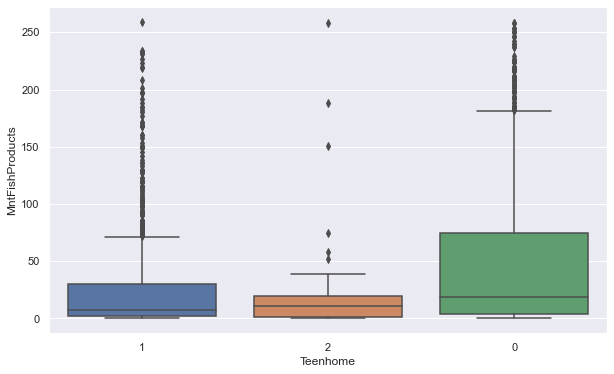

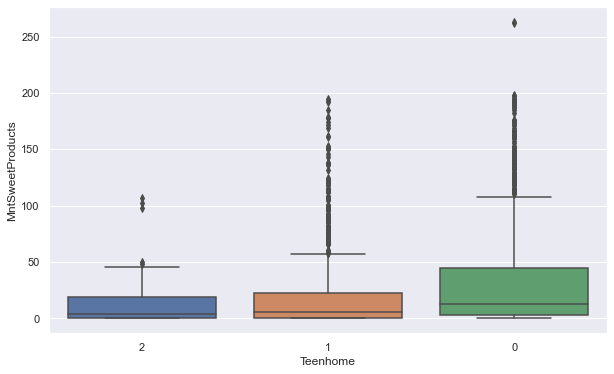

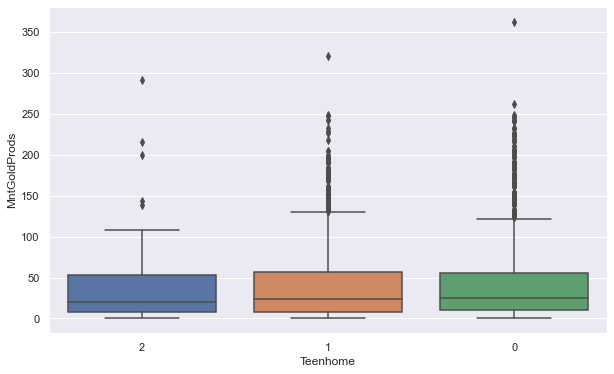

In [28]:
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntWines']].groupby(['Teenhome']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntFruits']].groupby(['Teenhome']).median().sort_values(by='MntFruits')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntFruits'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntMeatProducts']].groupby(['Teenhome']).median().sort_values(by='MntMeatProducts')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntMeatProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntFishProducts']].groupby(['Teenhome']).median().sort_values(by='MntFishProducts')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntFishProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntSweetProducts']].groupby(['Teenhome']).median().sort_values(by='MntSweetProducts')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntSweetProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData.loc[:,['Teenhome', 'MntGoldProds']].groupby(['Teenhome']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData['Teenhome'],y = customerData['MntGoldProds'],order=grouped.index,orient = "v")

<Figure size 144x432 with 0 Axes>

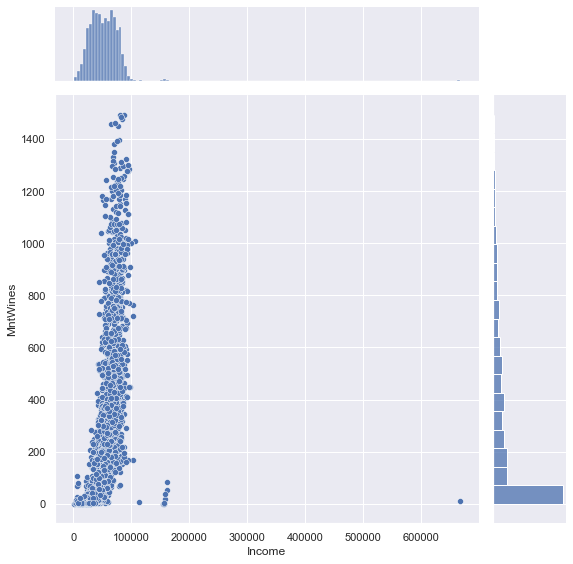

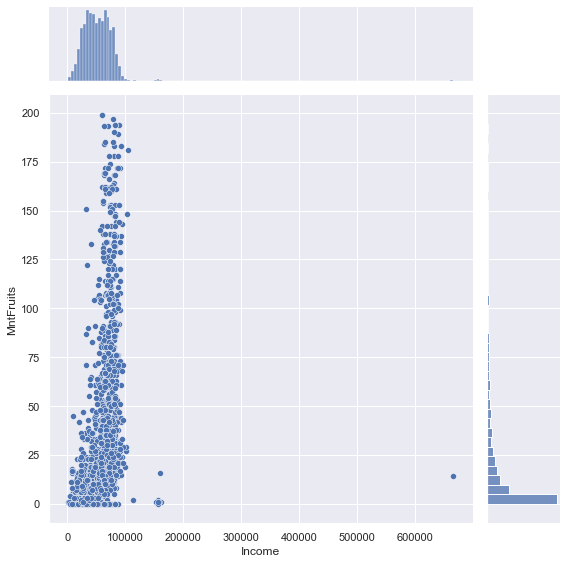

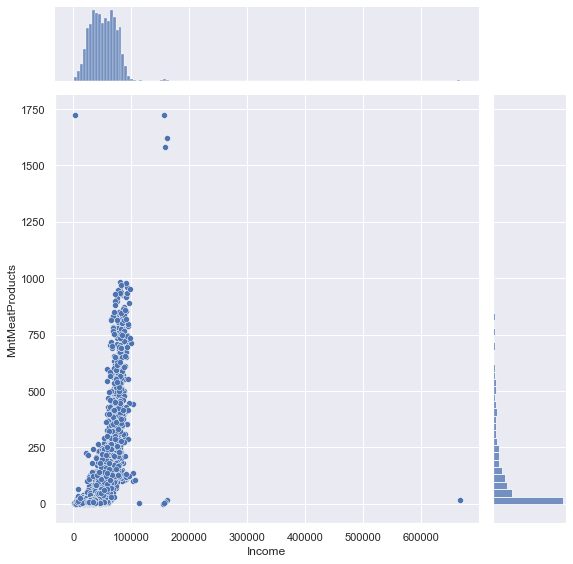

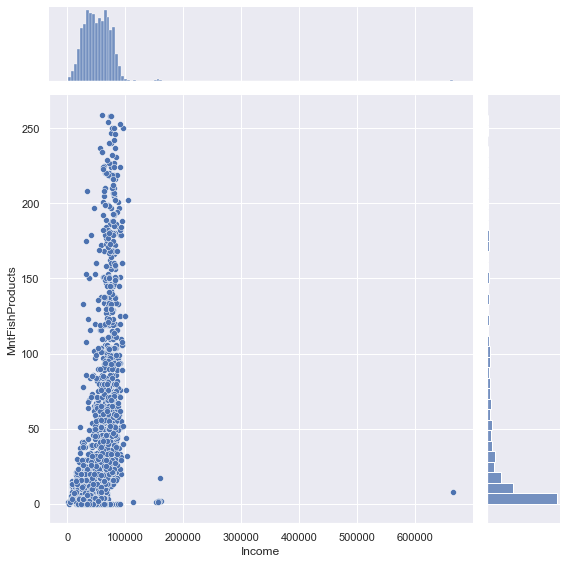

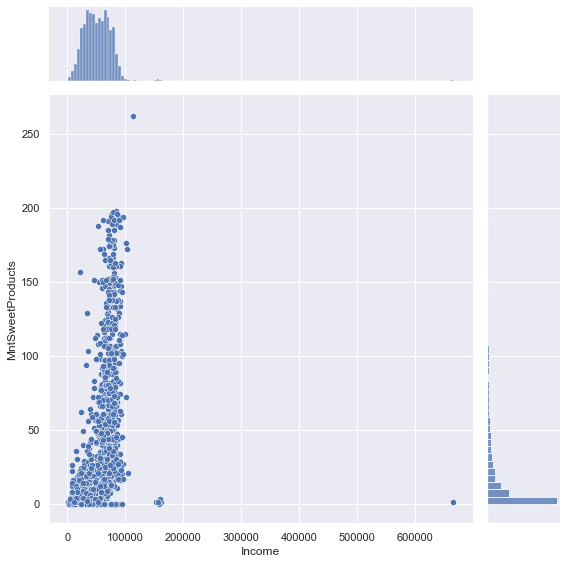

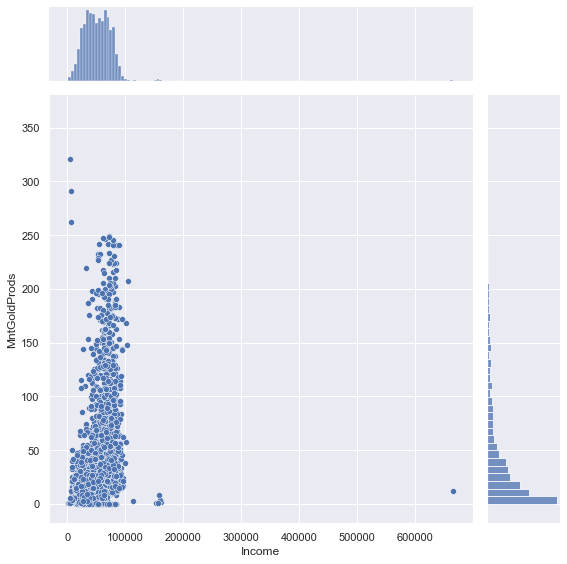

In [29]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = customerData, x = "Income", y = "MntFruits", height = 8)
sb.jointplot(data = customerData, x = "Income", y = "MntMeatProducts", height = 8)
sb.jointplot(data = customerData, x = "Income", y = "MntFishProducts", height = 8)
sb.jointplot(data = customerData, x = "Income", y = "MntSweetProducts", height = 8)
sb.jointplot(data = customerData, x = "Income", y = "MntGoldProds", height = 8)

## Basic Cleaning: Remove Strange Response - Absurd and YOLO 

In [30]:
customerData_clean = customerData.copy()

In [31]:
for data in colOfCat:
    customerData_clean[data] = customerData_clean[data].astype("category")

In [32]:
customerData_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2240 non-null   int64   
 1   Year_Birth           2240 non-null   int64   
 2   Education            2240 non-null   category
 3   Marital_Status       2240 non-null   category
 4   Income               2216 non-null   float64 
 5   Kidhome              2240 non-null   category
 6   Teenhome             2240 non-null   category
 7   Dt_Customer          2240 non-null   category
 8   Recency              2240 non-null   int64   
 9   MntWines             2240 non-null   int64   
 10  MntFruits            2240 non-null   int64   
 11  MntMeatProducts      2240 non-null   int64   
 12  MntFishProducts      2240 non-null   int64   
 13  MntSweetProducts     2240 non-null   int64   
 14  MntGoldProds         2240 non-null   int64   
 15  NumDealsPurchases    

In [33]:
deleteData = customerData_clean.loc[(customerData_clean.Marital_Status == "Absurd") | (customerData_clean.Marital_Status == "YOLO")]
print(deleteData.index.tolist())
customerData_clean = customerData_clean.drop(index = deleteData.index.tolist())
customerData_clean

[2093, 2134, 2177, 2202]


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


Number of Marital_Status: 6
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        0
YOLO          0
Name: Marital_Status, dtype: int64


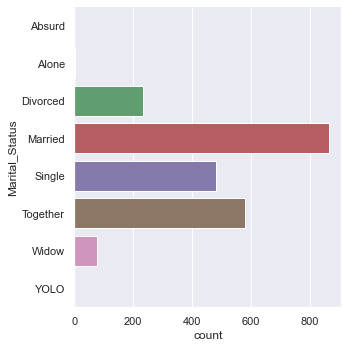

In [34]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Marital_Status:", len(customerData_clean["Marital_Status"].unique()))

# Pokemons in each Generation
print(customerData_clean["Marital_Status"].value_counts())
sb.catplot(y = "Marital_Status", data = customerData_clean, kind = "count")

<AxesSubplot:xlabel='Marital_Status', ylabel='MntGoldProds'>

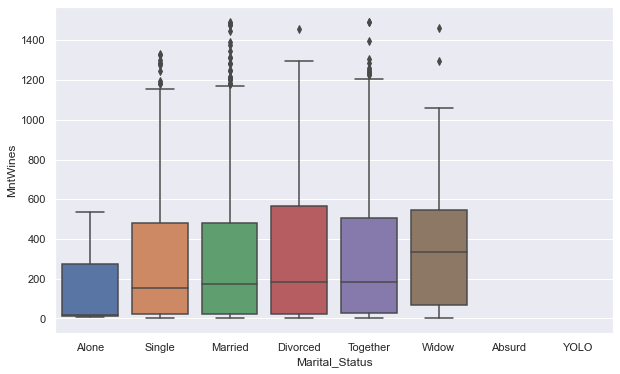

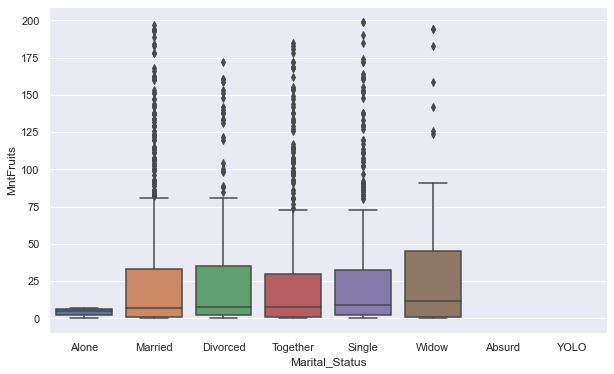

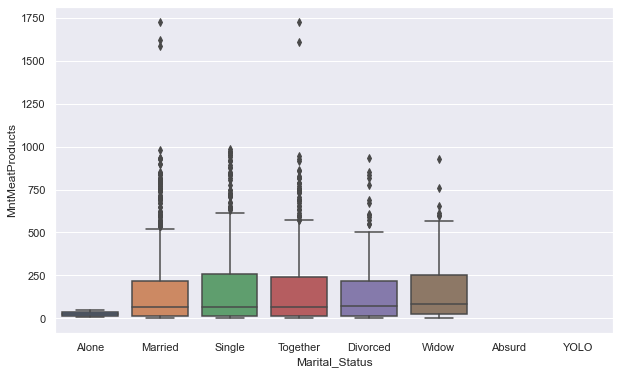

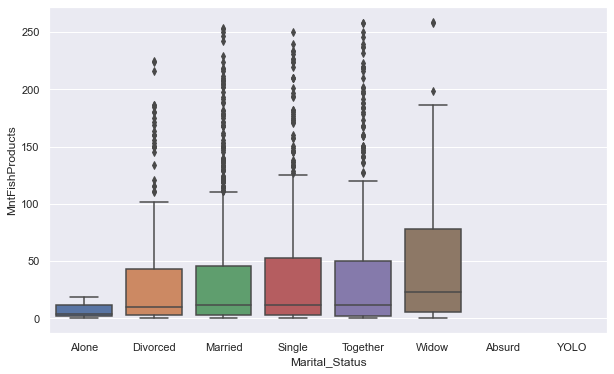

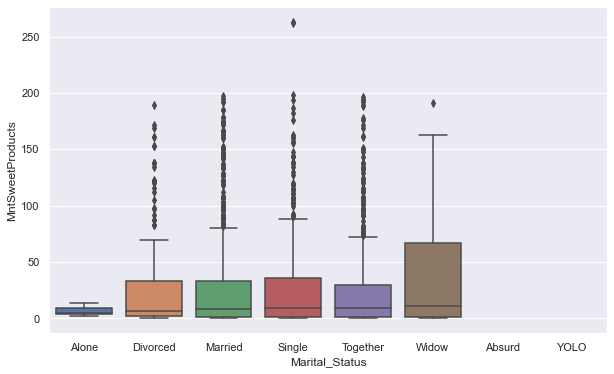

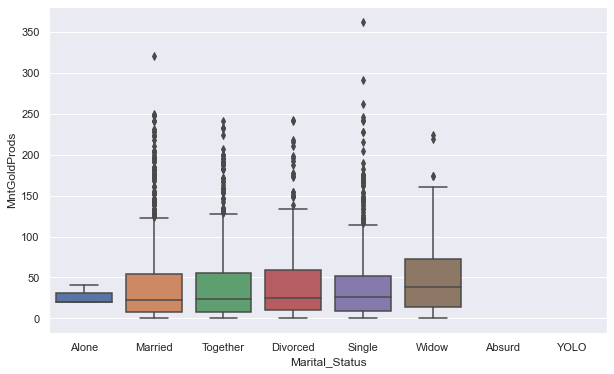

In [35]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntWines']].groupby(['Marital_Status']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntFruits']].groupby(['Marital_Status']).median().sort_values(by='MntFruits')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntFruits'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntMeatProducts']].groupby(['Marital_Status']).median().sort_values(by='MntMeatProducts')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntMeatProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntFishProducts']].groupby(['Marital_Status']).median().sort_values(by='MntFishProducts')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntFishProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntSweetProducts']].groupby(['Marital_Status']).median().sort_values(by='MntSweetProducts')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntSweetProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntGoldProds']].groupby(['Marital_Status']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")

## Basic Cleaning: Combine Alone + Single, Married + Together, Widow + Divorced

Number of Marital_Status: 3
Married     1444
Single       483
Divorced     309
Name: Marital_Status, dtype: int64


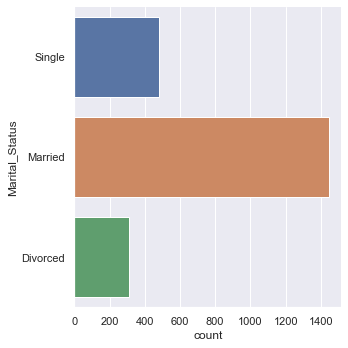

In [36]:
customerData_clean = customerData_clean.replace({'Marital_Status': {'Alone': 'Single','Together': 'Married','Widow': 'Divorced'}})
print("Number of Marital_Status:", len(customerData_clean["Marital_Status"].unique()))

# Pokemons in each Generation
print(customerData_clean["Marital_Status"].value_counts())
sb.catplot(y = "Marital_Status", data = customerData_clean, kind = "count")

<AxesSubplot:xlabel='Marital_Status', ylabel='MntGoldProds'>

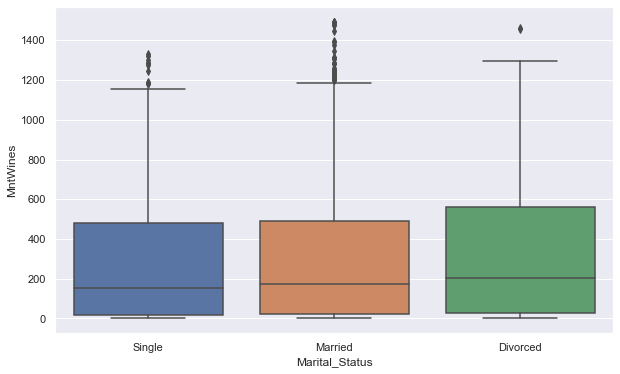

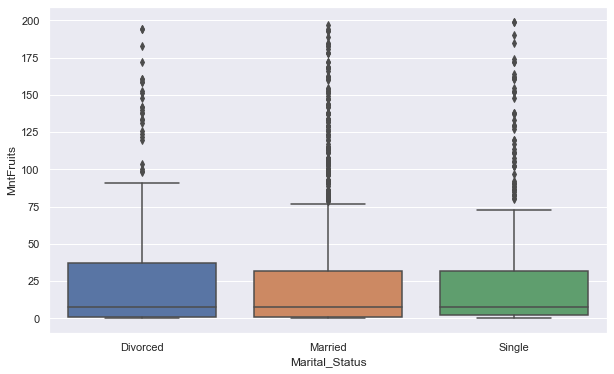

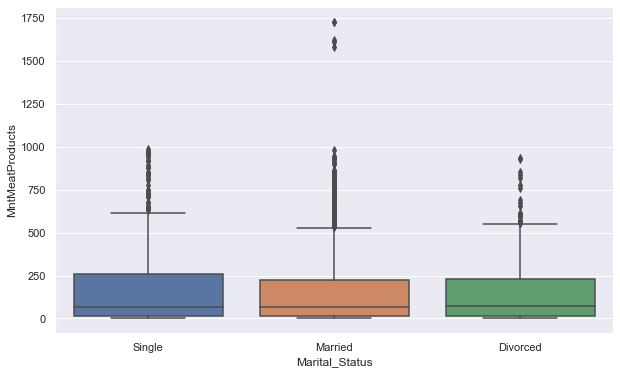

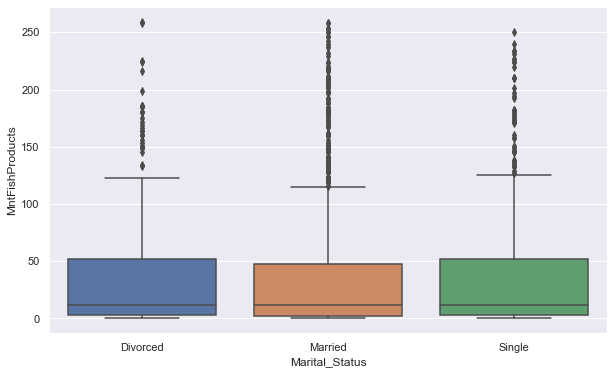

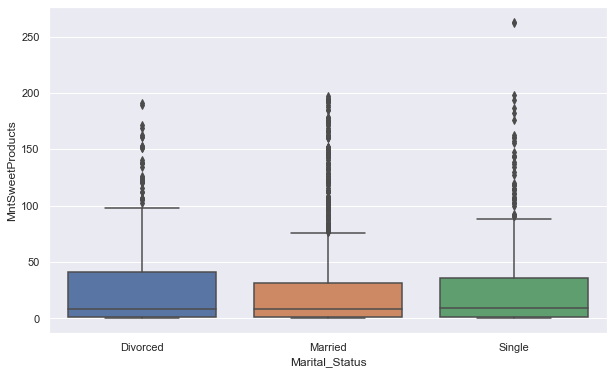

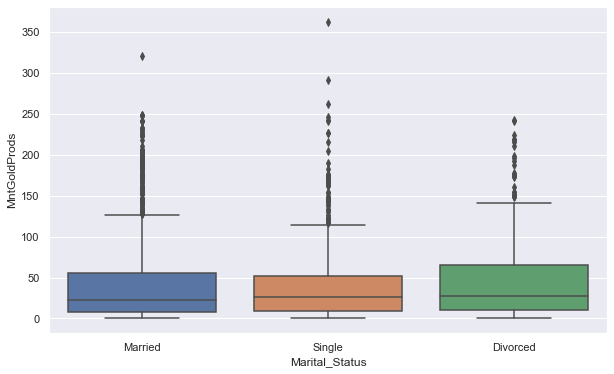

In [37]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntWines']].groupby(['Marital_Status']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntFruits']].groupby(['Marital_Status']).median().sort_values(by='MntFruits')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntFruits'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntMeatProducts']].groupby(['Marital_Status']).median().sort_values(by='MntMeatProducts')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntMeatProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntFishProducts']].groupby(['Marital_Status']).median().sort_values(by='MntFishProducts')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntFishProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntSweetProducts']].groupby(['Marital_Status']).median().sort_values(by='MntSweetProducts')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntSweetProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntGoldProds']].groupby(['Marital_Status']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")

## Basic Cleaning : Combine Grocery & TotalPurchase

In [38]:
customerData_clean.loc[:,'MntGroceryProducts'] = customerData_clean['MntMeatProducts'] + customerData_clean['MntFishProducts'] + customerData_clean['MntFruits']
customerData_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,3,11,1,806
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,3,11,0,9
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,3,11,0,287
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,3,11,0,34
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,3,11,0,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,3,11,0,267
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,3,11,0,30
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,3,11,0,297
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,3,11,0,324


In [39]:
customerData_clean.loc[:,'TotalPurchase'] = customerData_clean['NumDealsPurchases'] + customerData_clean['NumWebPurchases'] + customerData_clean['NumCatalogPurchases'] + customerData['NumStorePurchases']
customerData_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,3,11,1,806,25.0
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,3,11,0,9,6.0
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,3,11,0,287,21.0
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,3,11,0,34,8.0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,3,11,0,207,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,3,11,0,267,18.0
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,1,0,0,3,11,0,30,22.0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,1,0,0,0,0,3,11,0,297,19.0
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,3,11,0,324,23.0


<AxesSubplot:xlabel='Marital_Status', ylabel='TotalPurchase'>

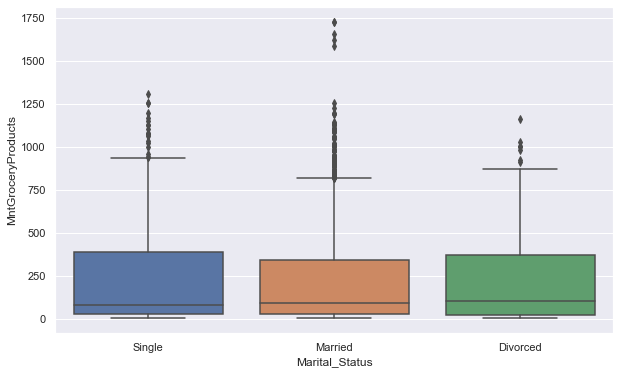

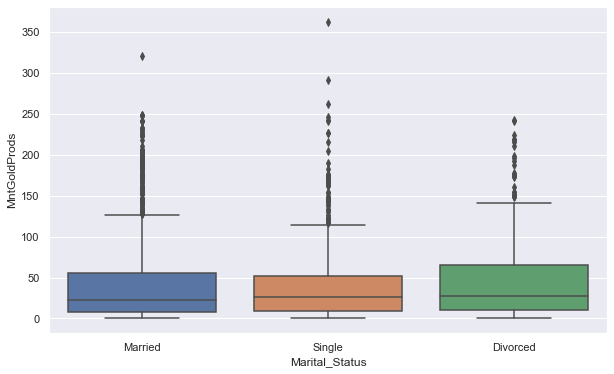

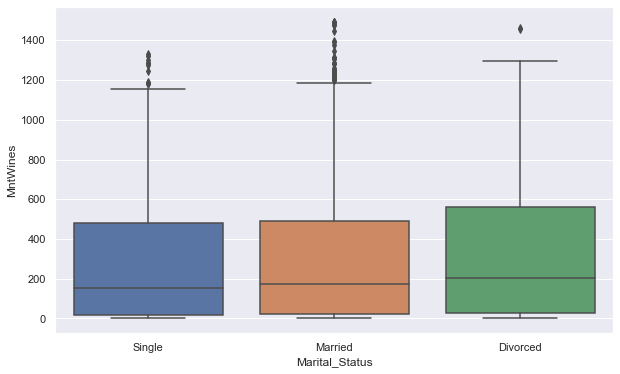

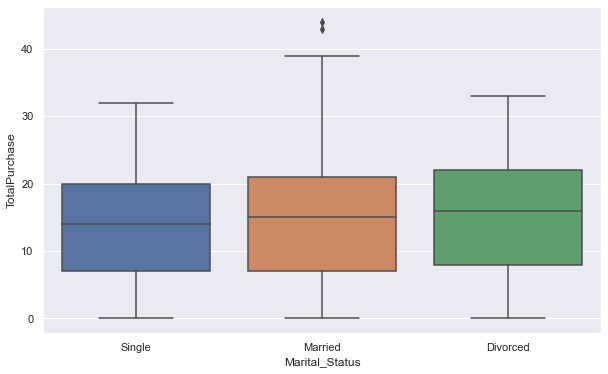

In [40]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntGroceryProducts']].groupby(['Marital_Status']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntGoldProds']].groupby(['Marital_Status']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntWines']].groupby(['Marital_Status']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'TotalPurchase']].groupby(['Marital_Status']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Education', ylabel='TotalPurchase'>

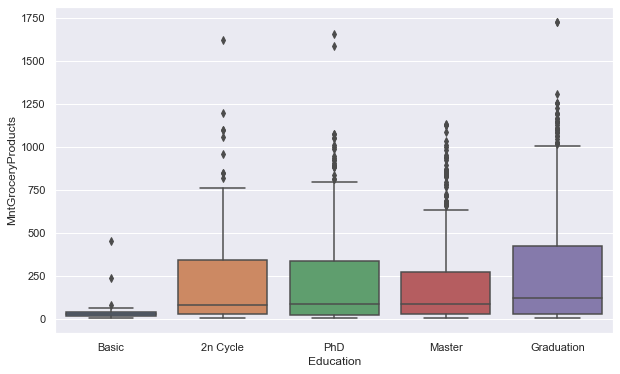

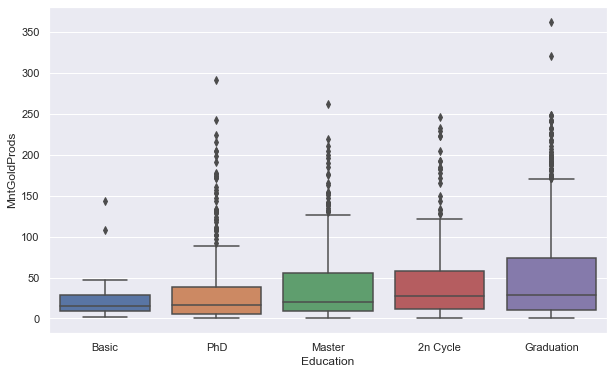

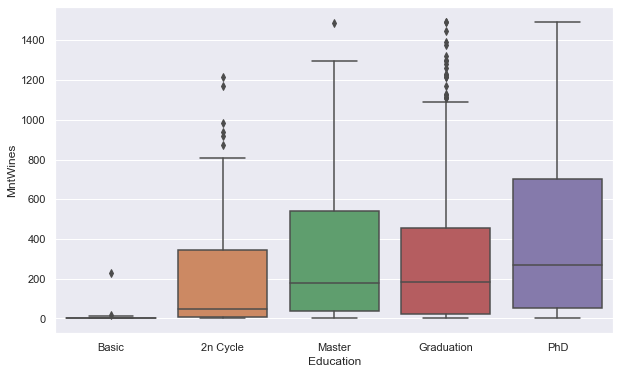

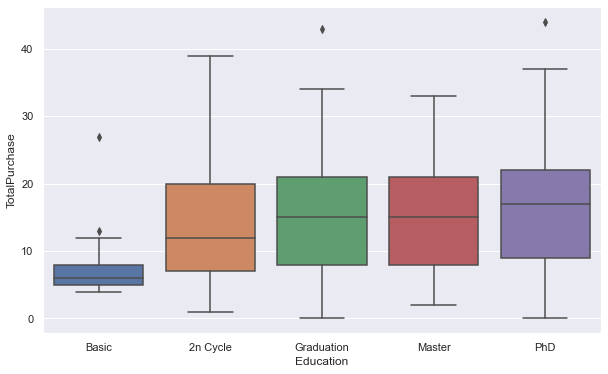

In [41]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Education', 'MntGroceryProducts']].groupby(['Education']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['Education'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Education', 'MntGoldProds']].groupby(['Education']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Education'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Education', 'MntWines']].groupby(['Education']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Education'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Education', 'TotalPurchase']].groupby(['Education']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['Education'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Kidhome', ylabel='TotalPurchase'>

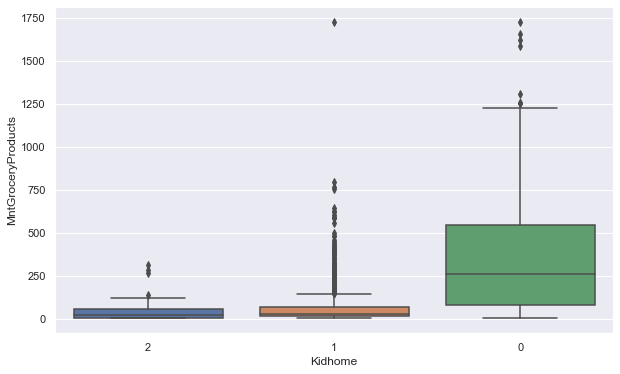

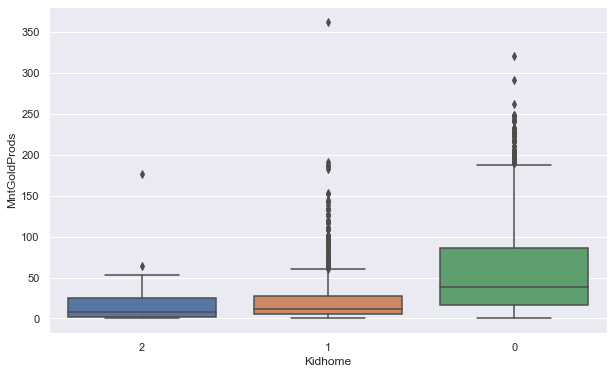

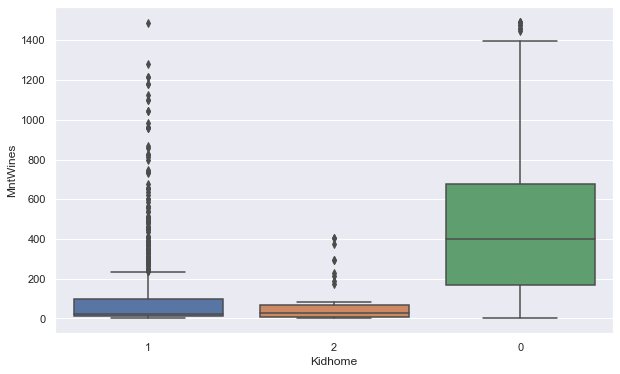

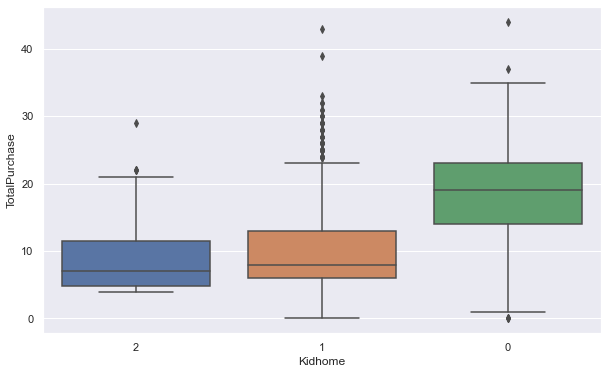

In [42]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Kidhome', 'MntGroceryProducts']].groupby(['Kidhome']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['Kidhome'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Kidhome', 'MntGoldProds']].groupby(['Kidhome']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Kidhome'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Kidhome', 'MntWines']].groupby(['Kidhome']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Kidhome'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Kidhome', 'TotalPurchase']].groupby(['Kidhome']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['Kidhome'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Teenhome', ylabel='TotalPurchase'>

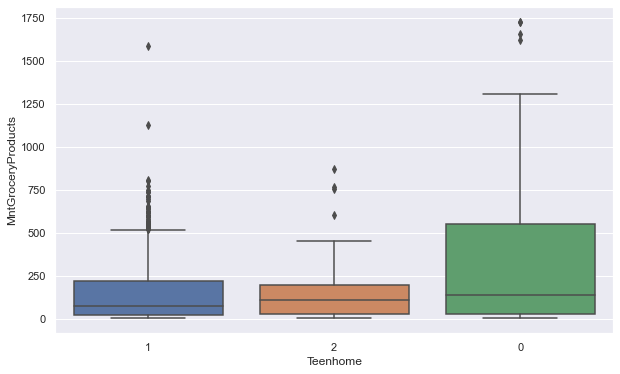

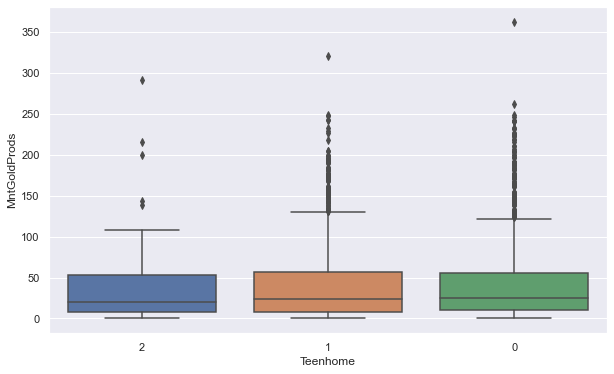

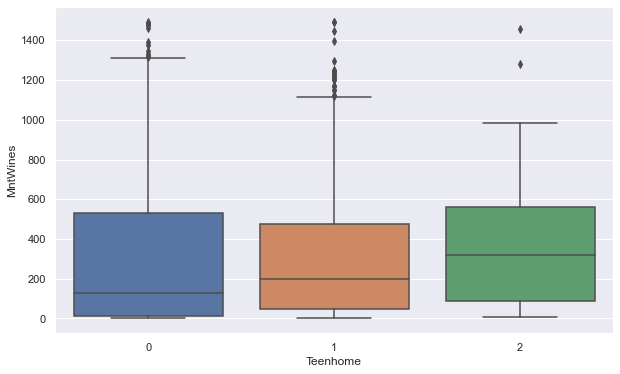

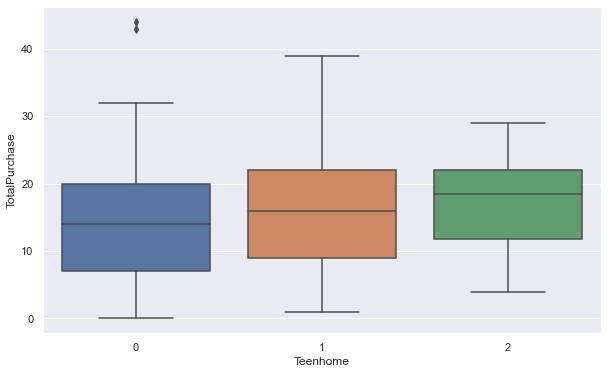

In [43]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Teenhome', 'MntGroceryProducts']].groupby(['Teenhome']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['Teenhome'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Teenhome', 'MntGoldProds']].groupby(['Teenhome']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Teenhome'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Teenhome', 'MntWines']].groupby(['Teenhome']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Teenhome'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Teenhome', 'TotalPurchase']].groupby(['Teenhome']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['Teenhome'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

<Figure size 144x432 with 0 Axes>

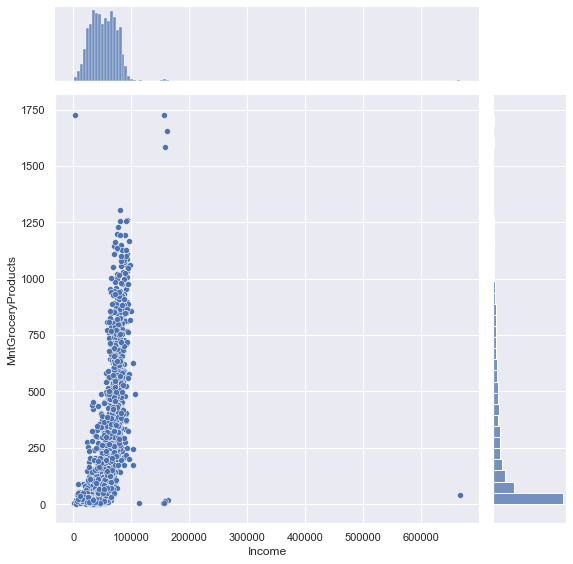

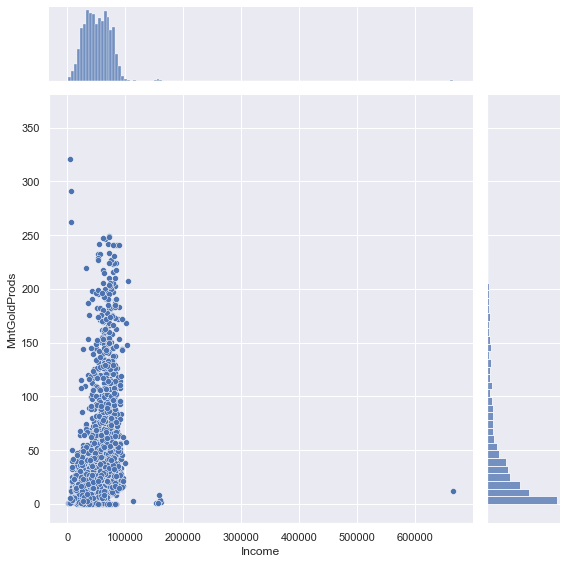

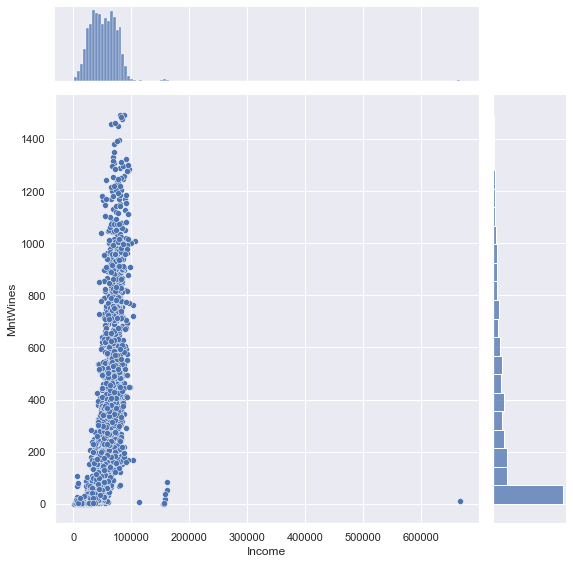

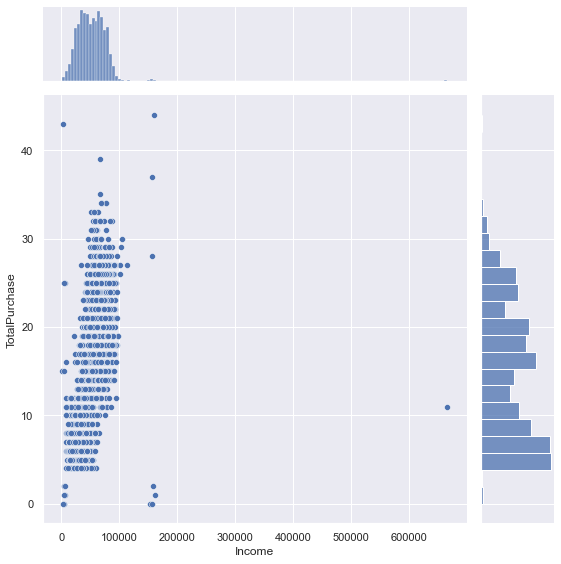

In [44]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_clean, x = "Income", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "MntGoldProds", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "TotalPurchase", height = 8)

## Basic Cleaning: Year distribution

<AxesSubplot:>

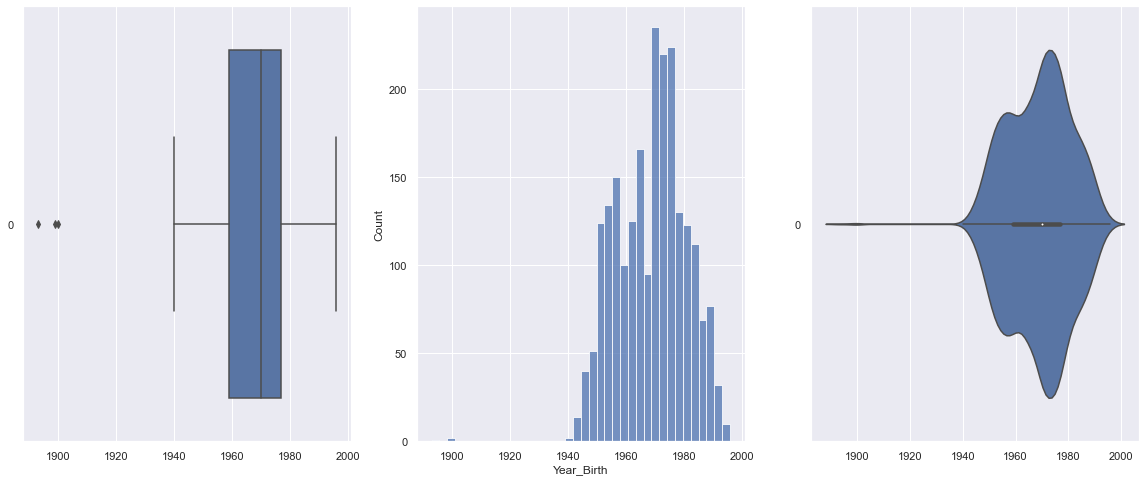

In [45]:
f, axes = plt.subplots(1,3, figsize=(20, 8))
sb.boxplot(data = customerData_clean['Year_Birth'], orient = "h", ax = axes[0])
sb.histplot(data = customerData_clean['Year_Birth'], ax = axes[1])
sb.violinplot(data = customerData_clean['Year_Birth'], orient = "h", ax = axes[2])

In [46]:
outliers_Year = pd.DataFrame(customerData_clean[customerData_clean["Year_Birth"] <= 1910])
outliers_Year

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,26-09-2013,99,15,...,0,0,0,0,1,3,11,0,21,6.0
239,11004,1893,2n Cycle,Single,60182.0,0,1,17-05-2014,23,8,...,0,0,0,0,0,3,11,0,12,4.0
339,1150,1899,PhD,Married,83532.0,0,0,26-09-2013,36,755,...,0,1,0,0,0,3,11,0,810,15.0


In [47]:
colOfNum_Clean = colOfNum.copy()
colOfNum_Clean.extend(["MntGroceryProducts","TotalPurchase"])
print(colOfNum_Clean)

['ID', 'Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue', 'MntGroceryProducts', 'TotalPurchase']


In [48]:
outliersNum_Year = pd.DataFrame(outliers_Year[colOfNum_Clean])
outliersNum_Year

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,MntGroceryProducts,TotalPurchase
192,7829,1900,36640.0,99,15,6,8,7,4,25,1,2,1,2,5,3,11,21,6.0
239,11004,1893,60182.0,23,8,0,5,7,0,2,1,1,0,2,4,3,11,12,4.0
339,1150,1899,83532.0,36,755,144,562,104,64,224,1,4,6,4,1,3,11,810,15.0


In [49]:
outliersCat_Year = pd.DataFrame(outliers_Year[colOfCat])
outliersCat_Year

,Education,Marital_Status,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kidhome,Teenhome
192,2n Cycle,Divorced,26-09-2013,0,0,0,0,0,1,0,1,0
239,2n Cycle,Single,17-05-2014,0,0,0,0,0,0,0,0,1
339,PhD,Married,26-09-2013,0,0,1,0,0,0,0,0,0


In [50]:
outliersNum_Year.describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,MntGroceryProducts,TotalPurchase
count,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.0,3.000000,3.000000,3.000000,3.000000,3.0,3.0,3.000000,3.000000
mean,6661.000000,1897.333333,60118.000000,52.666667,259.333333,50.000000,191.666667,39.333333,22.666667,83.666667,1.0,2.333333,2.333333,2.666667,3.333333,3.0,11.0,281.000000,8.333333
std,5029.761128,3.785939,23446.065512,40.648903,429.274194,81.461647,320.721582,56.002976,35.851546,122.075113,0.0,1.527525,3.214550,1.154701,2.081666,0.0,0.0,458.149539,5.859465
min,1150.000000,1893.000000,36640.000000,23.000000,8.000000,0.000000,5.000000,7.000000,0.000000,2.000000,1.0,1.000000,0.000000,2.000000,1.000000,3.0,11.0,12.000000,4.000000
25%,4489.500000,1896.000000,48411.000000,29.500000,11.500000,3.000000,6.500000,7.000000,2.000000,13.500000,1.0,1.500000,0.500000,2.000000,2.500000,3.0,11.0,16.500000,5.000000
50%,7829.000000,1899.000000,60182.000000,36.000000,15.000000,6.000000,8.000000,7.000000,4.000000,25.000000,1.0,2.000000,1.000000,2.000000,4.000000,3.0,11.0,21.000000,6.000000
75%,9416.500000,1899.500000,71857.000000,67.500000,385.000000,75.000000,285.000000,55.500000,34.000000,124.500000,1.0,3.000000,3.500000,3.000000,4.500000,3.0,11.0,415.500000,10.500000
max,11004.000000,1900.000000,83532.000000,99.000000,755.000000,144.000000,562.000000,104.000000,64.000000,224.000000,1.0,4.000000,6.000000,4.000000,5.000000,3.0,11.0,810.000000,15.000000


In [51]:
customerData_clean['YearRange'] = customerData_clean["Year_Birth"] / 10
customerData_clean['YearRange'] = customerData_clean['YearRange'].astype("int64")
customerData_clean['YearRange'] = customerData_clean["YearRange"] * 10

In [52]:
customerData_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase,YearRange
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,3,11,1,806,25.0,1950
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,3,11,0,9,6.0,1950
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,3,11,0,287,21.0,1960
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,3,11,0,34,8.0,1980
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,3,11,0,207,19.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,3,11,0,267,18.0,1960
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,1,0,0,3,11,0,30,22.0,1940
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,0,0,3,11,0,297,19.0,1980
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,3,11,0,324,23.0,1950


In [53]:
customerData_clean['YearRange'] = customerData_clean['YearRange'].astype("category")

In [54]:
colOfCat_Clean = colOfCat.copy()
colOfCat_Clean.extend(["YearRange"])
print(colOfCat_Clean)

['Education', 'Marital_Status', 'Dt_Customer', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response', 'Kidhome', 'Teenhome', 'YearRange']


In [55]:
customerData_clean[colOfCat_Clean].describe()

,Education,Marital_Status,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kidhome,Teenhome,YearRange
count,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236,2236
unique,5,3,663,2,2,2,2,2,2,2,3,3,8
top,Graduation,Married,31-08-2012,0,0,0,0,0,0,0,0,0,1970
freq,1126,1444,12,2073,2069,2074,2093,2206,2215,1904,1289,1156,738


Number of YearRange: 8
1970    738
1960    506
1950    459
1980    363
1940    107
1990     60
1890      2
1900      1
Name: YearRange, dtype: int64


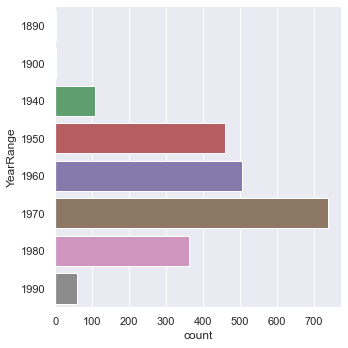

In [56]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of YearRange:", len(customerData_clean["YearRange"].unique()))

# Pokemons in each Generation
print(customerData_clean["YearRange"].value_counts())
sb.catplot(y = "YearRange", data = customerData_clean, kind = "count")

<AxesSubplot:xlabel='YearRange', ylabel='TotalPurchase'>

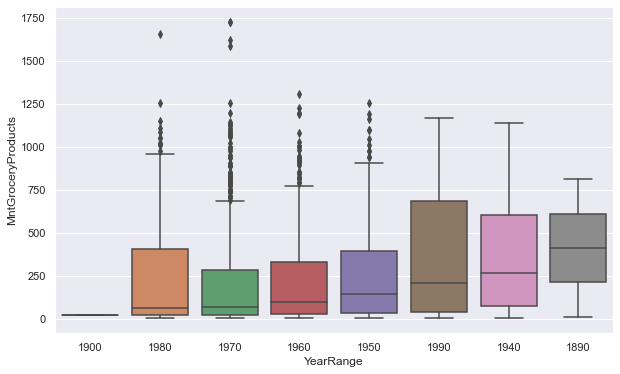

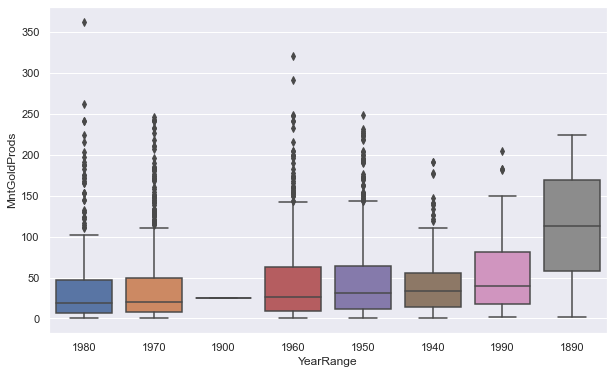

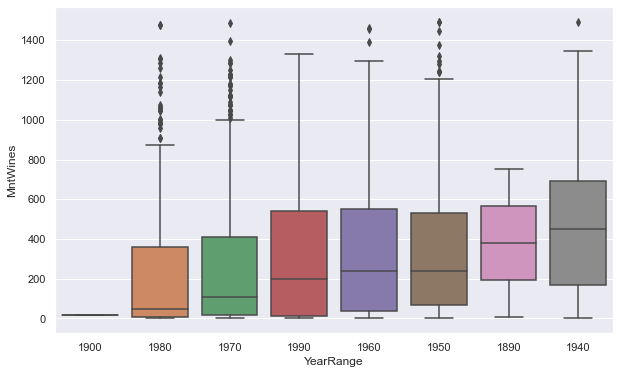

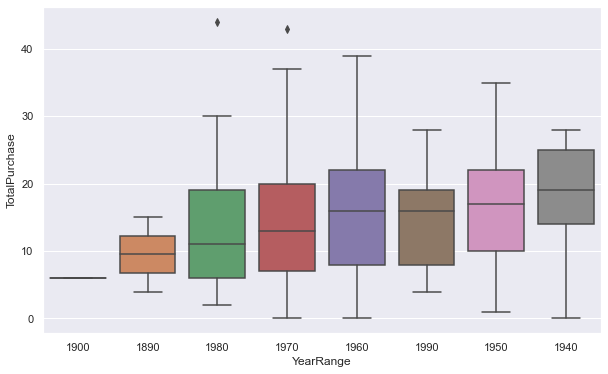

In [57]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['YearRange', 'MntGroceryProducts']].groupby(['YearRange']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['YearRange'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['YearRange', 'MntGoldProds']].groupby(['YearRange']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['YearRange'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['YearRange', 'MntWines']].groupby(['YearRange']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['YearRange'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['YearRange', 'TotalPurchase']].groupby(['YearRange']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['YearRange'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

## Basic Cleaning: Outliers Checking

In [72]:
customerData_clean["Income"].describe()

count      2212.000000
mean      52232.510850
std       25187.455359
min        1730.000000
25%       35233.500000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [58]:
outliers = pd.DataFrame(customerData_clean[customerData_clean["Income"] >= 600000])
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,MntGroceryProducts,TotalPurchase,YearRange
2233,9432,1977,Graduation,Married,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,3,11,0,40,11.0,1970


In [59]:
outliersNum = pd.DataFrame(outliers[colOfNum_Clean])
outliersNum

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,MntGroceryProducts,TotalPurchase
2233,9432,1977,666666.0,23,9,14,18,8,1,12,4,3,1,3,6,3,11,40,11.0


In [60]:
customerData_clean.describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,MntGroceryProducts,TotalPurchase
count,2236.000000,2236.000000,2212.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.0,2236.0,2236.000000,2236.000000
mean,5591.551878,1968.796512,52232.510850,49.147138,303.873435,26.271020,166.924419,37.405188,27.081395,43.880590,2.322898,4.082737,2.659213,5.789356,5.317531,3.0,11.0,230.600626,14.854204
std,3245.240106,11.980604,25187.455359,28.954880,336.876776,39.761356,225.778550,54.436749,41.300943,51.979634,1.932052,2.779736,2.920752,3.253756,2.424756,0.0,0.0,286.075560,7.681422
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,1.000000,0.000000
25%,2828.250000,1959.000000,35233.500000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,25.000000,8.000000
50%,5458.500000,1970.000000,51381.500000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,90.000000,15.000000
75%,8427.750000,1977.000000,68522.000000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,356.000000,21.000000
max,11191.000000,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,1727.000000,44.000000


In [61]:
outliersCat = pd.DataFrame(outliers[colOfCat_Clean])
outliersCat

,Education,Marital_Status,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kidhome,Teenhome,YearRange
2233,Graduation,Married,02-06-2013,0,0,0,0,0,0,0,1,0,1970


## Basic exploration: NULL value

In [62]:
customerData_clean["Income"].describe()

count      2212.000000
mean      52232.510850
std       25187.455359
min        1730.000000
25%       35233.500000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [63]:
check = customerData_clean[customerData_clean["Income"].isnull() == True]
print(check.index)

Int64Index([  10,   27,   43,   48,   58,   71,   90,   91,   92,  128,  133,
             312,  319, 1379, 1382, 1383, 1386, 2059, 2061, 2078, 2079, 2081,
            2084, 2228],
           dtype='int64')


In [64]:
check[colOfNum_Clean]

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,MntGroceryProducts,TotalPurchase
10,1994,1983,NaN,11,5,5,6,0,2,1,1,1,0,2,7,3,11,11,4.0
27,5255,1986,NaN,19,5,1,3,3,263,362,0,27,0,0,1,3,11,7,27.0
43,7281,1959,NaN,80,81,11,50,3,2,39,1,1,3,4,2,3,11,64,9.0
48,7244,1951,NaN,96,48,5,48,6,10,7,3,2,1,4,6,3,11,59,10.0
58,8557,1982,NaN,57,11,3,22,2,2,6,2,2,0,3,6,3,11,27,7.0
71,10629,1973,NaN,25,25,3,43,17,4,17,3,3,0,3,8,3,11,63,9.0
90,8996,1957,NaN,4,230,42,192,49,37,53,12,7,2,8,9,3,11,283,29.0
91,9235,1957,NaN,45,7,0,8,2,0,1,1,1,0,2,7,3,11,10,4.0
92,5798,1973,NaN,87,445,37,359,98,28,18,1,2,4,8,1,3,11,494,15.0
128,8268,1961,NaN,23,352,0,27,10,0,15,3,6,1,7,6,3,11,37,17.0


In [65]:
check[colOfCat_Clean]

,Education,Marital_Status,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kidhome,Teenhome,YearRange
10,Graduation,Married,15-11-2013,0,0,0,0,0,0,0,1,0,1980
27,Graduation,Single,20-02-2013,0,0,0,0,0,0,0,1,0,1980
43,PhD,Single,05-11-2013,0,0,0,0,0,0,0,0,0,1950
48,Graduation,Single,01-01-2014,0,0,0,0,0,0,0,2,1,1950
58,Graduation,Single,17-06-2013,0,0,0,0,0,0,0,1,0,1980
71,2n Cycle,Married,14-09-2012,0,0,0,0,0,0,0,1,0,1970
90,PhD,Married,19-11-2012,0,0,0,0,0,0,0,2,1,1950
91,Graduation,Single,27-05-2014,0,0,0,0,0,0,0,1,1,1950
92,Master,Married,23-11-2013,0,0,0,0,0,0,0,0,0,1970
128,PhD,Married,11-07-2013,0,0,0,0,0,0,0,0,1,1960


In [67]:
check[colOfNum_Clean].describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,MntGroceryProducts,TotalPurchase
count,24.000000,24.000000,0.0,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.0,24.0,24.000000,24.000000
mean,5943.625000,1967.458333,NaN,58.041667,197.208333,21.333333,162.708333,27.166667,30.208333,49.250000,2.458333,4.041667,1.833333,4.791667,5.083333,3.0,11.0,211.208333,13.125000
std,3028.349268,12.021644,NaN,29.492046,242.479758,38.310705,339.420411,41.281290,58.488928,79.599678,2.653614,5.303642,2.478896,3.175712,2.586195,0.0,0.0,369.047302,8.216169
min,1295.000000,1943.000000,NaN,4.000000,5.000000,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,7.000000,1.000000
25%,3063.250000,1957.750000,NaN,35.500000,22.000000,1.000000,14.500000,2.000000,1.500000,6.750000,1.000000,1.000000,0.000000,3.000000,3.000000,3.0,11.0,16.500000,6.500000
50%,5526.500000,1969.500000,NaN,62.000000,76.000000,3.500000,35.000000,8.000000,4.000000,17.500000,1.500000,2.500000,1.000000,4.000000,6.000000,3.0,11.0,48.000000,10.500000
75%,8597.750000,1974.250000,NaN,82.250000,286.000000,24.250000,177.000000,40.750000,31.750000,55.000000,3.000000,5.250000,3.000000,7.000000,7.000000,3.0,11.0,253.750000,19.500000
max,10629.000000,1989.000000,NaN,96.000000,861.000000,138.000000,1607.000000,164.000000,263.000000,362.000000,12.000000,27.000000,10.000000,12.000000,9.000000,3.0,11.0,1621.000000,29.000000


In [68]:
check[colOfCat_Clean].describe()

,Education,Marital_Status,Dt_Customer,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Kidhome,Teenhome,YearRange
count,24,24,24,24,24,24,24,24,24,24,24,24,24
unique,4,3,24,1,2,2,2,1,1,2,3,3,5
top,Graduation,Married,23-11-2013,0,0,0,0,0,0,0,1,1,1950
freq,11,14,1,24,21,23,22,24,24,23,12,12,7


## Basic Cleaning: Fill in NA Value

In [78]:
customerData_clean["Income"].describe()

count      2212.000000
mean      52232.510850
std       25187.455359
min        1730.000000
25%       35233.500000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [82]:
values = {"Income": 51381.500000}
customerData_clean = customerData_clean.fillna(value=values)

In [83]:
customerData_clean["Income"].describe()

count      2236.000000
mean      52223.376565
std       25052.009240
min        1730.000000
25%       35502.500000
50%       51381.500000
75%       68289.750000
max      666666.000000
Name: Income, dtype: float64

In [85]:
customerData_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2236 non-null   int64   
 1   Year_Birth           2236 non-null   int64   
 2   Education            2236 non-null   category
 3   Marital_Status       2236 non-null   object  
 4   Income               2236 non-null   float64 
 5   Kidhome              2236 non-null   category
 6   Teenhome             2236 non-null   category
 7   Dt_Customer          2236 non-null   category
 8   Recency              2236 non-null   int64   
 9   MntWines             2236 non-null   int64   
 10  MntFruits            2236 non-null   int64   
 11  MntMeatProducts      2236 non-null   int64   
 12  MntFishProducts      2236 non-null   int64   
 13  MntSweetProducts     2236 non-null   int64   
 14  MntGoldProds         2236 non-null   int64   
 15  NumDealsPurchases    

## Basic exploration: Correlation

In [86]:
customerData_clean.shape

(2236, 32)

In [87]:
customerData_clean.describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,MntGroceryProducts,TotalPurchase
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.0,2236.0,2236.000000,2236.000000
mean,5591.551878,1968.796512,52223.376565,49.147138,303.873435,26.271020,166.924419,37.405188,27.081395,43.880590,2.322898,4.082737,2.659213,5.789356,5.317531,3.0,11.0,230.600626,14.854204
std,3245.240106,11.980604,25052.009240,28.954880,336.876776,39.761356,225.778550,54.436749,41.300943,51.979634,1.932052,2.779736,2.920752,3.253756,2.424756,0.0,0.0,286.075560,7.681422
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,1.000000,0.000000
25%,2828.250000,1959.000000,35502.500000,24.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,3.0,11.0,25.000000,8.000000
50%,5458.500000,1970.000000,51381.500000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,3.0,11.0,90.000000,15.000000
75%,8427.750000,1977.000000,68289.750000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,3.0,11.0,356.000000,21.000000
max,11191.000000,1996.000000,666666.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,3.0,11.0,1727.000000,44.000000


In [88]:
customerData_clean.drop("Z_CostContact",inplace= True,axis = 1)
customerData_clean.drop("Z_Revenue",inplace= True,axis = 1)

In [89]:
colOfNum_Clean.remove("Z_CostContact")
colOfNum_Clean.remove("Z_Revenue")

In [92]:
customerData_clean.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'MntGroceryProducts',
       'TotalPurchase', 'YearRange'],
      dtype='object')

<AxesSubplot:>

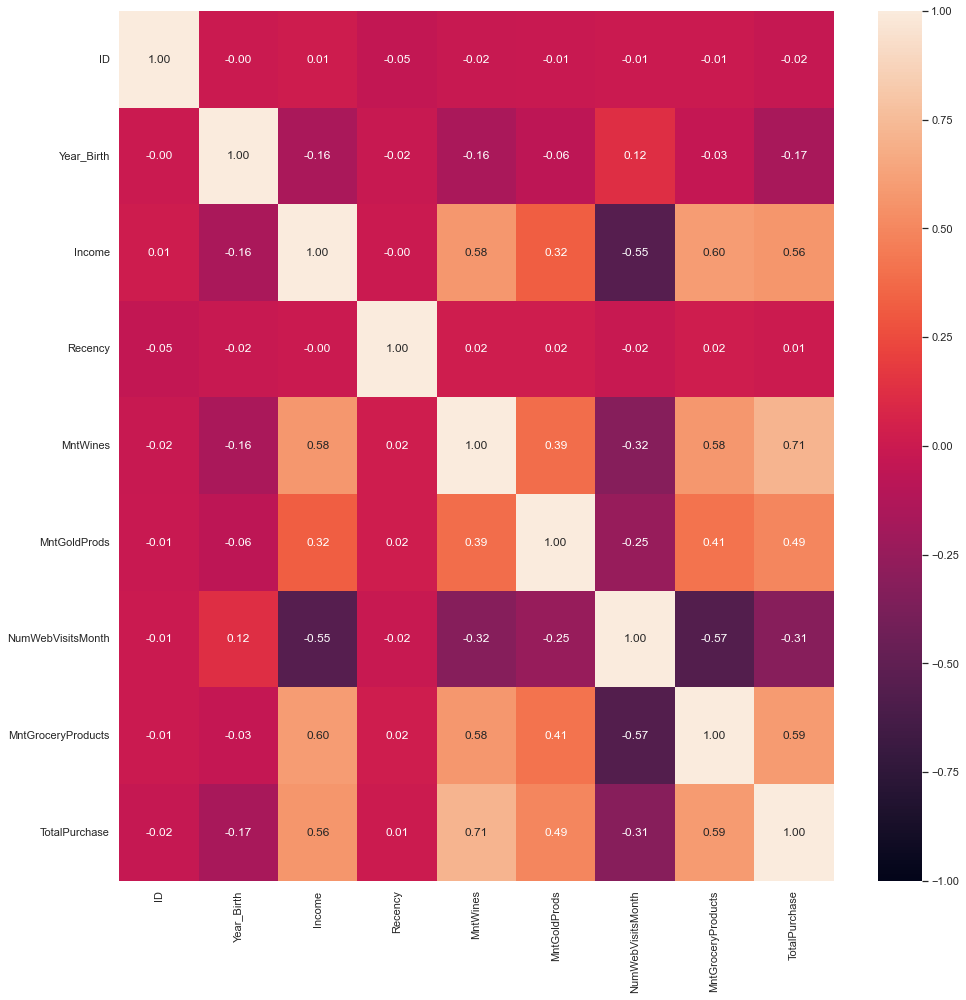

In [95]:
f = plt.figure(figsize=(16, 16))
sb.heatmap(customerData_clean[['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntGoldProds', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'MntGroceryProducts',
       'TotalPurchase', 'YearRange']].corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

In [100]:
customerData_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2236 non-null   int64   
 1   Year_Birth           2236 non-null   int64   
 2   Education            2236 non-null   category
 3   Marital_Status       2236 non-null   object  
 4   Income               2236 non-null   float64 
 5   Kidhome              2236 non-null   category
 6   Teenhome             2236 non-null   category
 7   Dt_Customer          2236 non-null   category
 8   Recency              2236 non-null   int64   
 9   MntWines             2236 non-null   int64   
 10  MntFruits            2236 non-null   int64   
 11  MntMeatProducts      2236 non-null   int64   
 12  MntFishProducts      2236 non-null   int64   
 13  MntSweetProducts     2236 non-null   int64   
 14  MntGoldProds         2236 non-null   int64   
 15  NumDealsPurchases    

Number of Response: 5
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


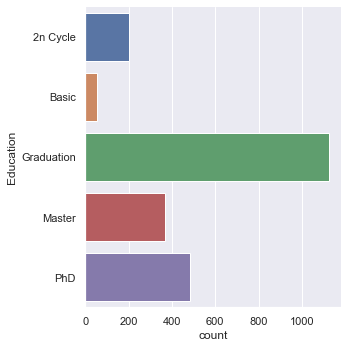

In [101]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of Response:", len(customerCatData["Education"].unique()))

# Pokemons in each Generation
print(customerCatData["Education"].value_counts())
sb.catplot(y = "Education", data = customerData_clean, kind = "count")

<AxesSubplot:xlabel='Education', ylabel='TotalPurchase'>

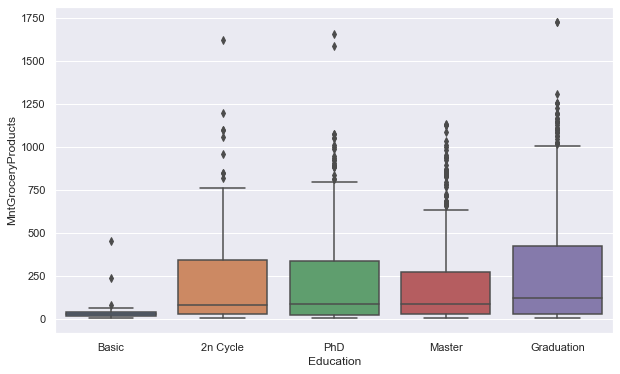

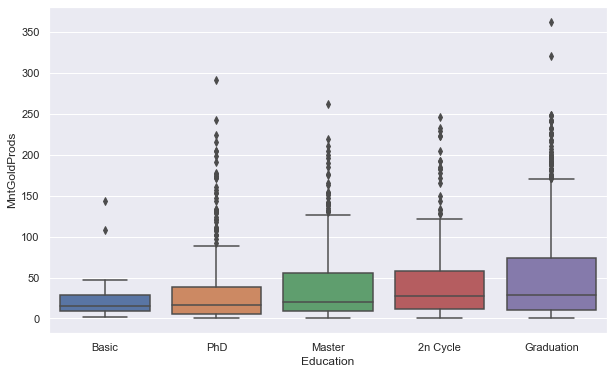

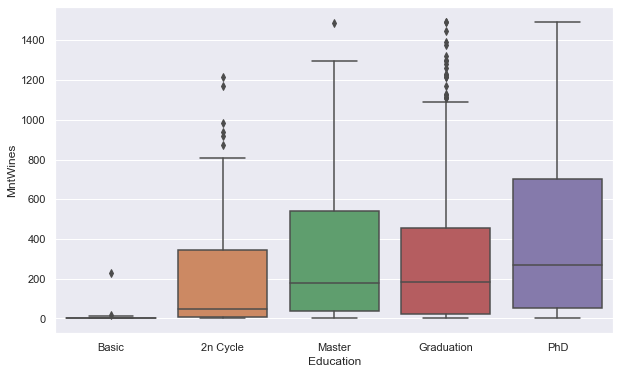

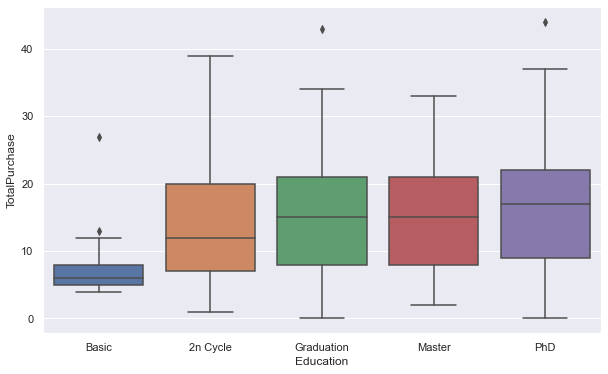

In [102]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Education', 'MntGroceryProducts']].groupby(['Education']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['Education'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Education', 'MntGoldProds']].groupby(['Education']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Education'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Education', 'MntWines']].groupby(['Education']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Education'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Education', 'TotalPurchase']].groupby(['Education']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['Education'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Marital_Status', ylabel='TotalPurchase'>

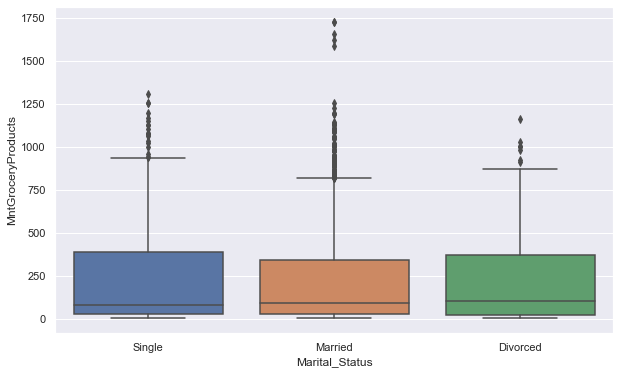

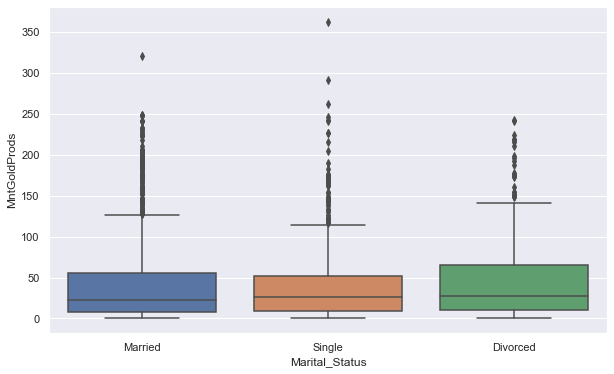

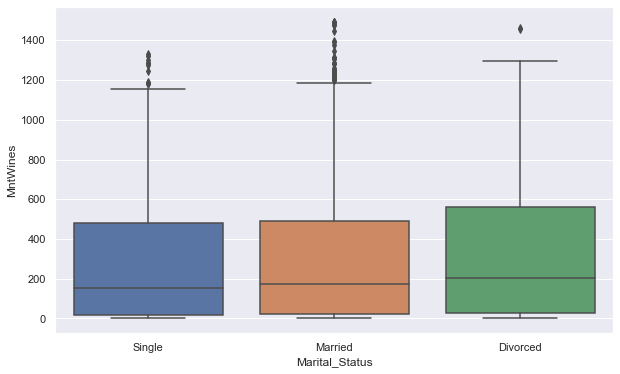

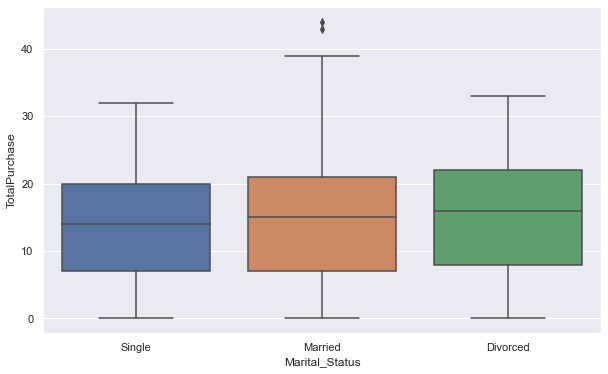

In [103]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntGroceryProducts']].groupby(['Marital_Status']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntGoldProds']].groupby(['Marital_Status']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'MntWines']].groupby(['Marital_Status']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Marital_Status', 'TotalPurchase']].groupby(['Marital_Status']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['Marital_Status'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

Number of YearRange: 8
1970    738
1960    506
1950    459
1980    363
1940    107
1990     60
1890      2
1900      1
Name: YearRange, dtype: int64


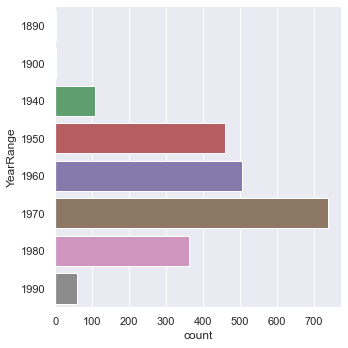

In [107]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of YearRange:", len(customerData_clean["YearRange"].unique()))

# Pokemons in each Generation
print(customerData_clean["YearRange"].value_counts())
sb.catplot(y = "YearRange", data = customerData_clean, kind = "count")

<AxesSubplot:xlabel='YearRange', ylabel='TotalPurchase'>

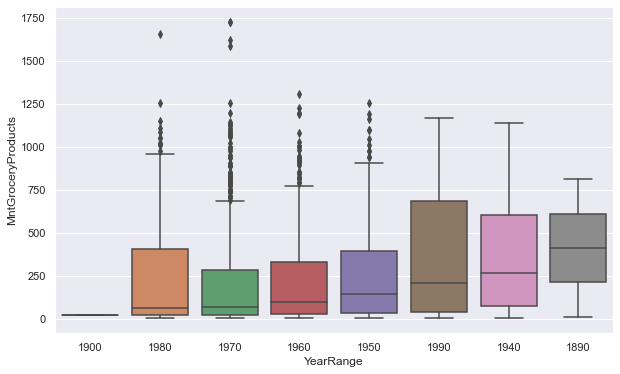

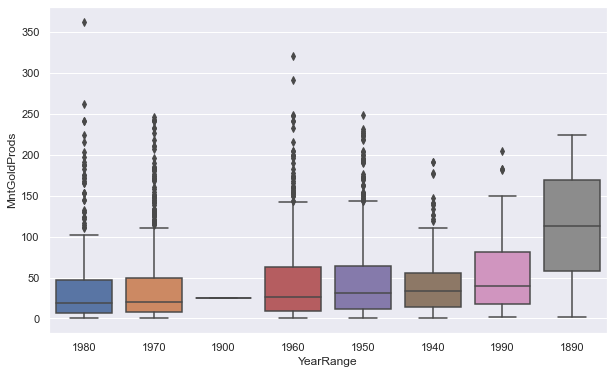

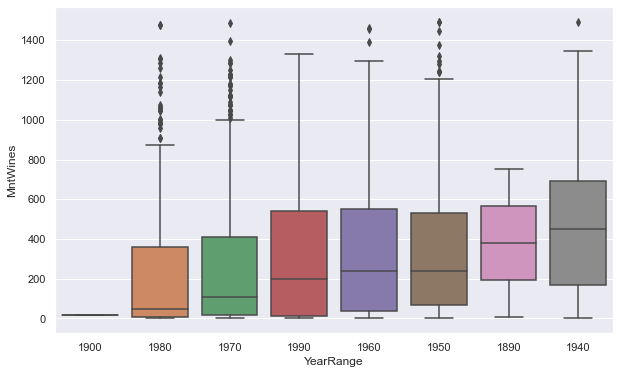

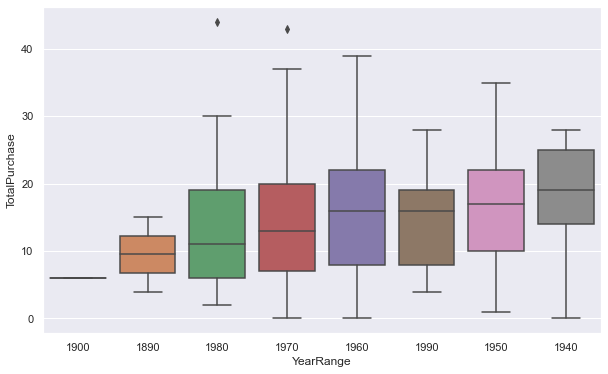

In [105]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['YearRange', 'MntGroceryProducts']].groupby(['YearRange']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['YearRange'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['YearRange', 'MntGoldProds']].groupby(['YearRange']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['YearRange'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['YearRange', 'MntWines']].groupby(['YearRange']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['YearRange'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['YearRange', 'TotalPurchase']].groupby(['YearRange']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['YearRange'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

## Basic Cleaning: Dropping outliers

In [108]:
outliers = pd.DataFrame(customerData_clean[customerData_clean["Income"] >= 600000])
outliers

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
2233,9432,1977,Graduation,Married,666666.0,1,0,02-06-2013,23,9,...,0,0,0,0,0,0,0,40,11.0,1970


In [111]:
outliers.index.tolist()

[2233]

In [112]:
customerData_clean = customerData_clean.drop(index = outliers.index.tolist())
customerData_clean

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,MntGroceryProducts,TotalPurchase,YearRange
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,0,0,0,0,1,806,25.0,1950
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,0,0,0,0,0,9,6.0,1950
2,4141,1965,Graduation,Married,71613.0,0,0,21-08-2013,26,426,...,0,0,0,0,0,0,0,287,21.0,1960
3,6182,1984,Graduation,Married,26646.0,1,0,10-02-2014,26,11,...,0,0,0,0,0,0,0,34,8.0,1980
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,0,0,0,0,0,207,19.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,0,0,0,0,0,267,18.0,1960
2236,4001,1946,PhD,Married,64014.0,2,1,10-06-2014,56,406,...,0,0,0,1,0,0,0,30,22.0,1940
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,1,0,0,0,0,0,297,19.0,1980
2238,8235,1956,Master,Married,69245.0,0,1,24-01-2014,8,428,...,0,0,0,0,0,0,0,324,23.0,1950


In [113]:
customerData_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2235 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   2235 non-null   int64   
 1   Year_Birth           2235 non-null   int64   
 2   Education            2235 non-null   category
 3   Marital_Status       2235 non-null   object  
 4   Income               2235 non-null   float64 
 5   Kidhome              2235 non-null   category
 6   Teenhome             2235 non-null   category
 7   Dt_Customer          2235 non-null   category
 8   Recency              2235 non-null   int64   
 9   MntWines             2235 non-null   int64   
 10  MntFruits            2235 non-null   int64   
 11  MntMeatProducts      2235 non-null   int64   
 12  MntFishProducts      2235 non-null   int64   
 13  MntSweetProducts     2235 non-null   int64   
 14  MntGoldProds         2235 non-null   int64   
 15  NumDealsPurchases    

In [120]:
customerData_clean.describe()

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,5589.833557,1968.792841,51948.458166,49.158837,304.005369,26.276510,166.991051,37.418345,27.093065,43.894855,2.322148,4.083221,2.659955,5.790604,5.317226,230.685906,14.855928
std,3244.948773,11.982027,21419.880689,28.956073,336.894379,39.769406,225.807085,54.445376,41.306498,51.986889,1.932159,2.780264,2.921195,3.253949,2.425256,286.111151,7.682708
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2827.500000,1959.000000,35482.000000,24.000000,23.500000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,25.000000,8.000000
50%,5455.000000,1970.000000,51381.500000,49.000000,173.000000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,90.000000,15.000000
75%,8423.500000,1977.000000,68277.500000,74.000000,505.000000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,356.000000,21.000000
max,11191.000000,1996.000000,162397.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1727.000000,44.000000


Number of NumWebVisitsMonth: 16
7     393
8     340
6     339
5     281
4     218
3     205
2     201
1     152
9      83
0      11
20      3
10      3
14      2
19      2
17      1
13      1
Name: NumWebVisitsMonth, dtype: int64


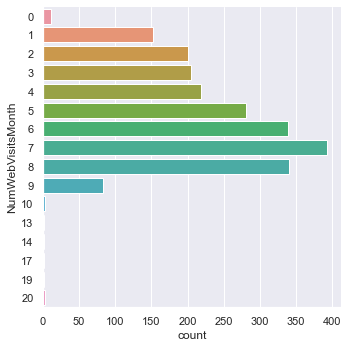

In [122]:
#Cite M2 ExploratoryAnalysis

# Generations in the Dataset
print("Number of NumWebVisitsMonth:", len(customerData_clean["NumWebVisitsMonth"].unique()))

# Pokemons in each Generation
print(customerData_clean["NumWebVisitsMonth"].value_counts())
sb.catplot(y = "NumWebVisitsMonth", data = customerData_clean, kind = "count")

<AxesSubplot:xlabel='NumWebVisitsMonth', ylabel='TotalPurchase'>

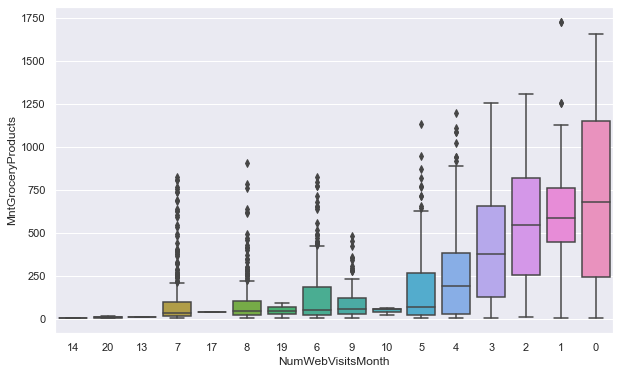

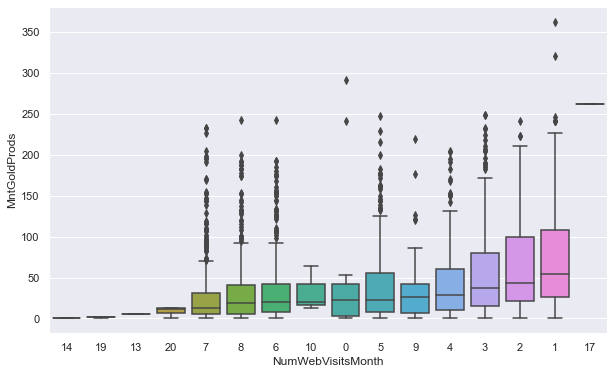

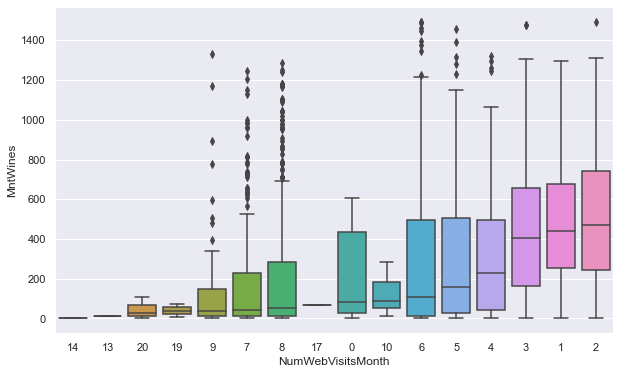

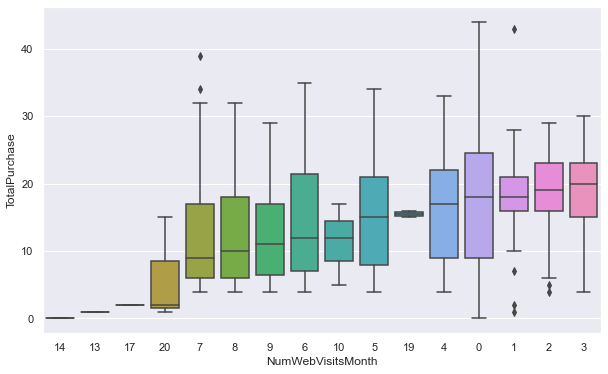

In [123]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['NumWebVisitsMonth', 'MntGroceryProducts']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['NumWebVisitsMonth'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['NumWebVisitsMonth', 'MntGoldProds']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['NumWebVisitsMonth'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['NumWebVisitsMonth', 'MntWines']].groupby(['NumWebVisitsMonth']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['NumWebVisitsMonth'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['NumWebVisitsMonth', 'TotalPurchase']].groupby(['NumWebVisitsMonth']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['NumWebVisitsMonth'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

<Figure size 144x432 with 0 Axes>

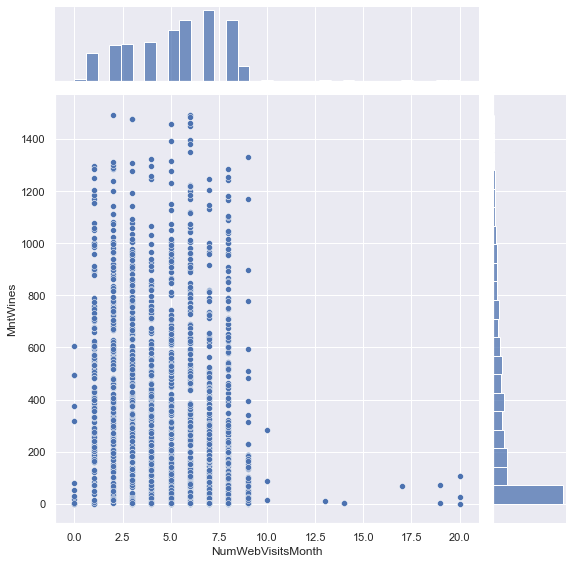

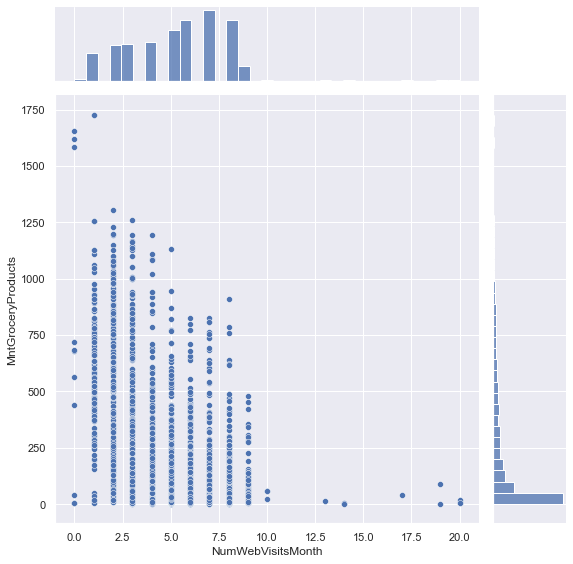

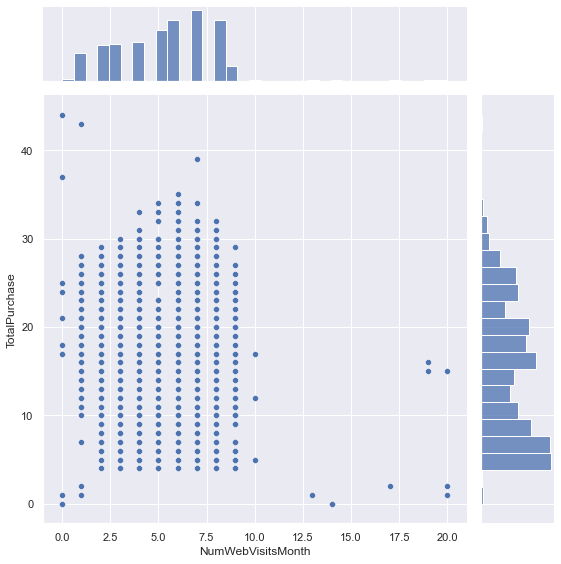

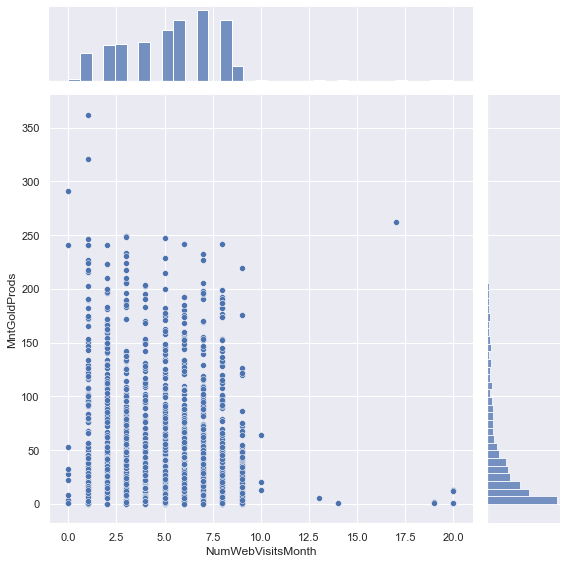

In [124]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_clean, x = "NumWebVisitsMonth", y = "MntWines", height = 8)
sb.jointplot(data = customerData_clean, x = "NumWebVisitsMonth", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = customerData_clean, x = "NumWebVisitsMonth", y = "TotalPurchase", height = 8)
sb.jointplot(data = customerData_clean, x = "NumWebVisitsMonth", y = "MntGoldProds", height = 8)

<Figure size 144x432 with 0 Axes>

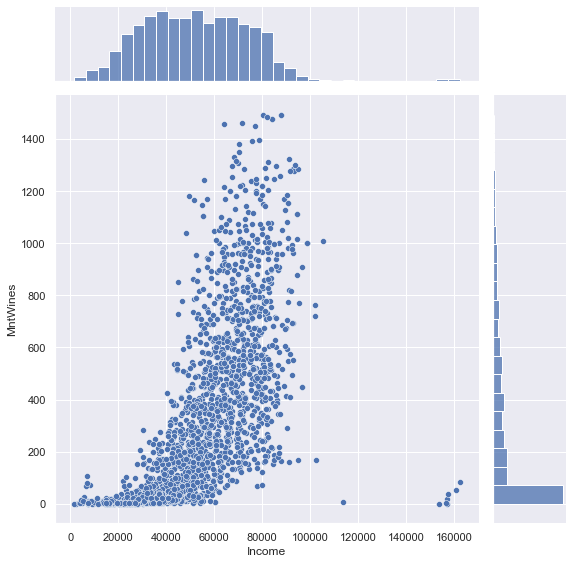

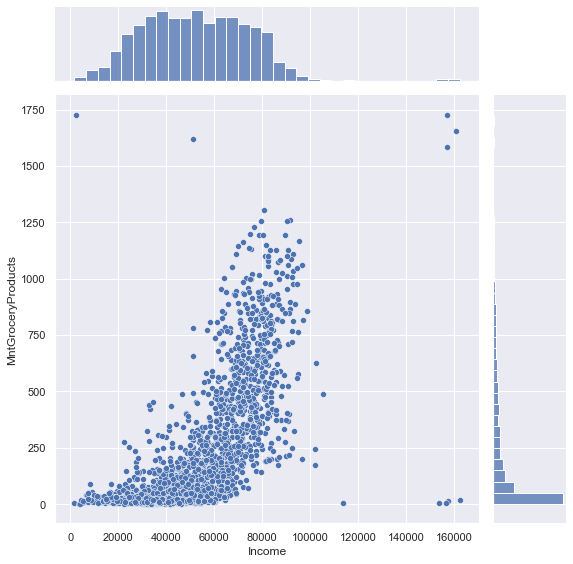

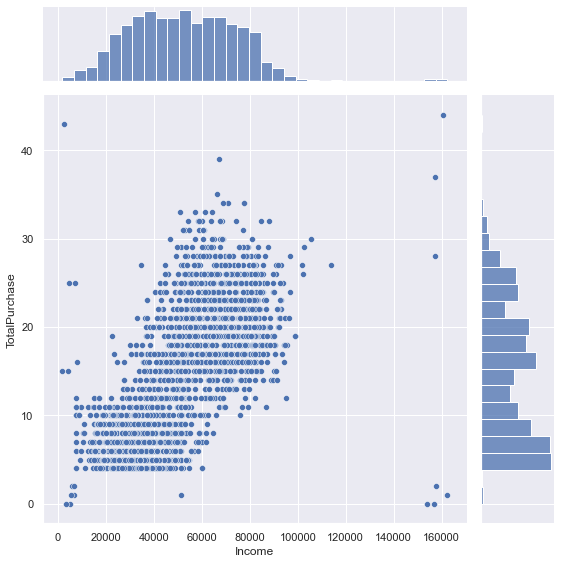

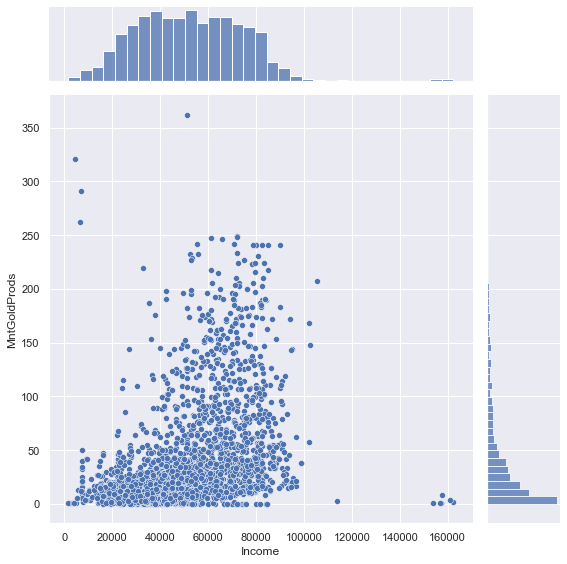

In [114]:
f = plt.figure(figsize=(2, 6))
sb.jointplot(data = customerData_clean, x = "Income", y = "MntWines", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "MntGroceryProducts", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "TotalPurchase", height = 8)
sb.jointplot(data = customerData_clean, x = "Income", y = "MntGoldProds", height = 8)

<AxesSubplot:xlabel='Complain', ylabel='TotalPurchase'>

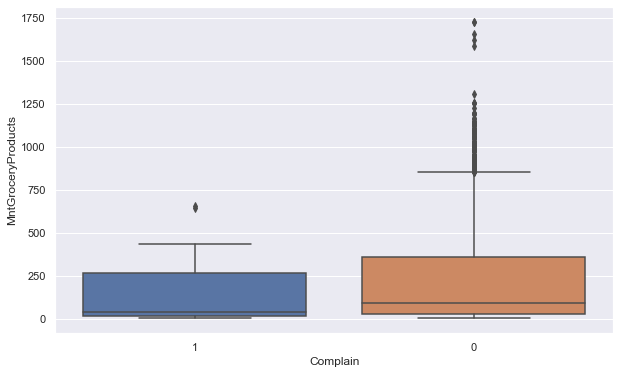

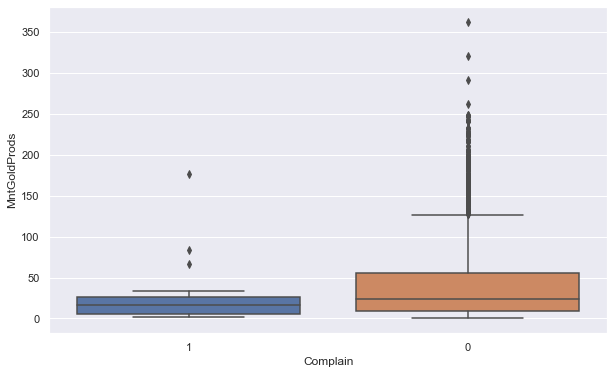

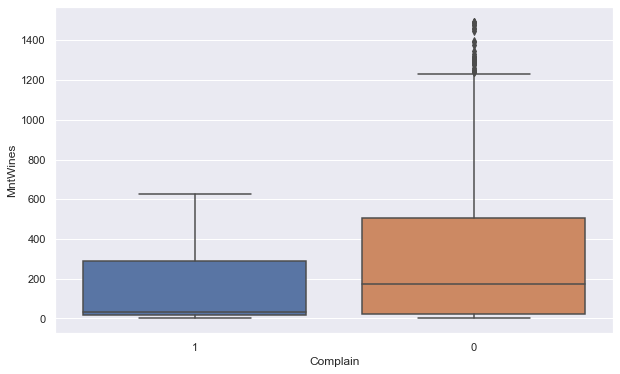

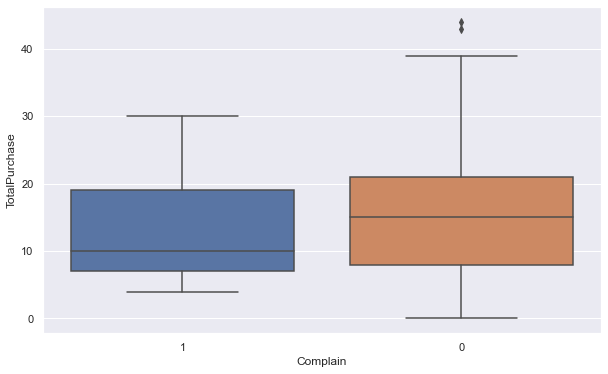

In [118]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Complain', 'MntGroceryProducts']].groupby(['Complain']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['Complain'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Complain', 'MntGoldProds']].groupby(['Complain']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Complain'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Complain', 'MntWines']].groupby(['Complain']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Complain'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Complain', 'TotalPurchase']].groupby(['Complain']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['Complain'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

<AxesSubplot:xlabel='Recency', ylabel='TotalPurchase'>

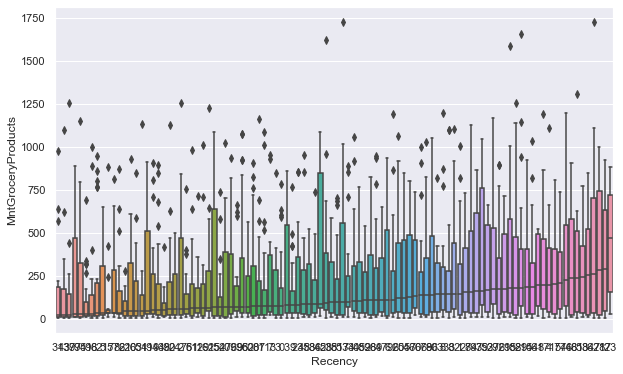

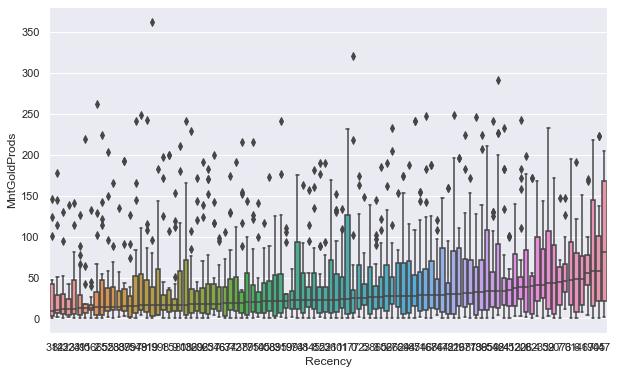

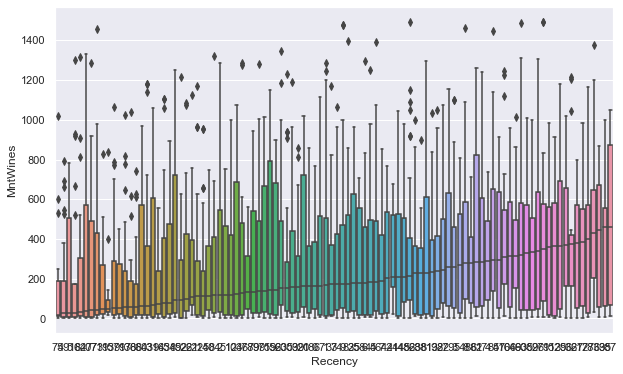

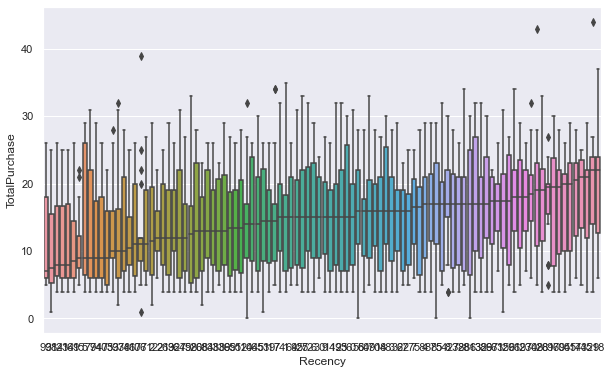

In [117]:
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Recency', 'MntGroceryProducts']].groupby(['Recency']).median().sort_values(by='MntGroceryProducts')
sb.boxplot(x = customerData_clean['Recency'],y = customerData_clean['MntGroceryProducts'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Recency', 'MntGoldProds']].groupby(['Recency']).median().sort_values(by='MntGoldProds')
sb.boxplot(x = customerData_clean['Recency'],y = customerData_clean['MntGoldProds'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Recency', 'MntWines']].groupby(['Recency']).median().sort_values(by='MntWines')
sb.boxplot(x = customerData_clean['Recency'],y = customerData_clean['MntWines'],order=grouped.index,orient = "v")
f = plt.figure(figsize=(10, 6))
grouped = customerData_clean.loc[:,['Recency', 'TotalPurchase']].groupby(['Recency']).median().sort_values(by='TotalPurchase')
sb.boxplot(x = customerData_clean['Recency'],y = customerData_clean['TotalPurchase'],order=grouped.index,orient = "v")

In [127]:
outliers_sth = customerData_clean.loc[(customerData_clean.Income <= 20000) & (customerData_clean.TotalPurchase >= 40)]
outliers_sth[colOfNum_Clean]

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase
21,5376,1979,2447.0,42,1,1,1725,1,1,1,15,0,28,0,1,1727,43.0


In [128]:
outliers_sth = customerData_clean.loc[(customerData_clean.Income <= 20000) & (customerData_clean.MntGoldProds >= 250)]
outliers_sth[colOfNum_Clean]

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase
1328,4246,1982,6560.0,2,67,11,26,4,3,262,0,1,0,1,17,41,2.0
1806,6237,1966,7144.0,92,81,4,33,5,2,291,0,23,1,1,0,42,25.0
1975,10311,1969,4428.0,0,16,4,12,2,4,321,0,25,0,0,1,18,25.0


In [139]:
outliers_sth = customerData_clean.loc[(customerData_clean.Income == 0)]
outliers_sth[colOfNum_Clean]

,ID,Year_Birth,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,MntGroceryProducts,TotalPurchase


In [144]:
fit = np.polyfit(customerData_clean.MntGoldProds,np.log(customerData_clean.Income),1)

print(fit)

[3.39824489e-03 1.06040302e+01]
